In [2]:
# --- Imports ---
import os
import sys
import random
import pickle
import gymnasium as gym
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path

# --- GPU Configuration ---
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

# --- Add Modules directory to Python path ---
module_path = os.path.abspath(os.path.join('.', 'Modules'))

if module_path not in sys.path:
    sys.path.append(module_path)
    print(f"Added '{module_path}' to sys.path")
else:
    print(f"'{module_path}' already in sys.path")

# --- Import custom modules ---
from env_romo import WorkingMemoryEnv
from actor_critic_song import ActorCriticAgent
from reinforce_song import train_agent
from helper_functions import plot_metrics, plot_performance_matrix, plot_mean_firing_rate_trace, sesgo_contraccion, load_model, save_model 

# --- Set Random Seeds ---
seed_value = 1
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
random.seed(seed_value)

print("Setup Complete.")

2025-08-22 16:32:19.113231: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1755873140.069561   32450 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1755873140.302982   32450 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1755873142.608460   32450 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1755873142.608495   32450 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1755873142.608497   32450 computation_placer.cc:177] computation placer alr

Added '/mnt/c/Users/imcir/Desktop/CIENCIA DATOS/Segundo cuatrimestre/TFM/Código/Modules' to sys.path
Setup Complete.


Configuration loaded:
  dt: 10
  reward_correct: 1.0
  reward_incorrect: 0.0
  reward_aborted: -1.0
  input_noise_sigma: 0.01
  reward_fixation: 0.1
  reward_decide_fixation: -0.1
  duration_params: [10, 10, 10, 10, 10, 10]
  actor_hidden_size: 150
  critic_hidden_size: 150
  actor_layers: 1
  critic_layers: 1
  layer_type: GRU_modified
  actor_lr: 0.0001
  critic_lr: 0.0001
  num_episodes: 20000
  gamma: 1.0
  l2_actor: 0.0001
  l2_critic: 0.0001
  print_interval: 100
  record_history: True

Creating WorkingMemory environment...
Observation size: 3, Action size: 3

Initializing Actor-Critic Agent...


2025-08-21 12:27:50.958404: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Agent Initialized.

Starting training for 20000 episodes...
Episode 100	Total Reward: -1.00	State [1. 0. 0.]	Actor Loss: -1.0614	Critic Loss: 0.9379	Actions: [1]	M: N/A	Tau: N/A	
Episode 200	Total Reward: -1.00	State [1. 0. 0.]	Actor Loss: -0.9995	Critic Loss: 0.8259	Actions: [2]	M: N/A	Tau: N/A	
Episode 300	Total Reward: -1.00	State [1. 0. 0.]	Actor Loss: -0.8732	Critic Loss: 0.6250	Actions: [1]	M: N/A	Tau: N/A	
Episode 400	Total Reward: -0.80	State [1. 0. 0.]	Actor Loss: 0.0224	Critic Loss: 0.1226	Actions: [0, 0, 2]	M: N/A	Tau: N/A	
Episode 500	Total Reward: -0.90	State [1.        0.3356378 0.6932648]	Actor Loss: -0.0132	Critic Loss: 0.0989	Actions: [0, 1]	M: N/A	Tau: N/A	
Episode 600	Total Reward: -0.90	State [1.         0.3713142  0.67326134]	Actor Loss: 0.1300	Critic Loss: 0.1678	Actions: [0, 2]	M: N/A	Tau: N/A	
Episode 700	Total Reward: -1.00	State [1. 0. 0.]	Actor Loss: -0.1847	Critic Loss: 0.0317	Actions: [1]	M: N/A	Tau: N/A	
Episode 800	Total Reward: -1.00	State [1. 0. 0.]	Act

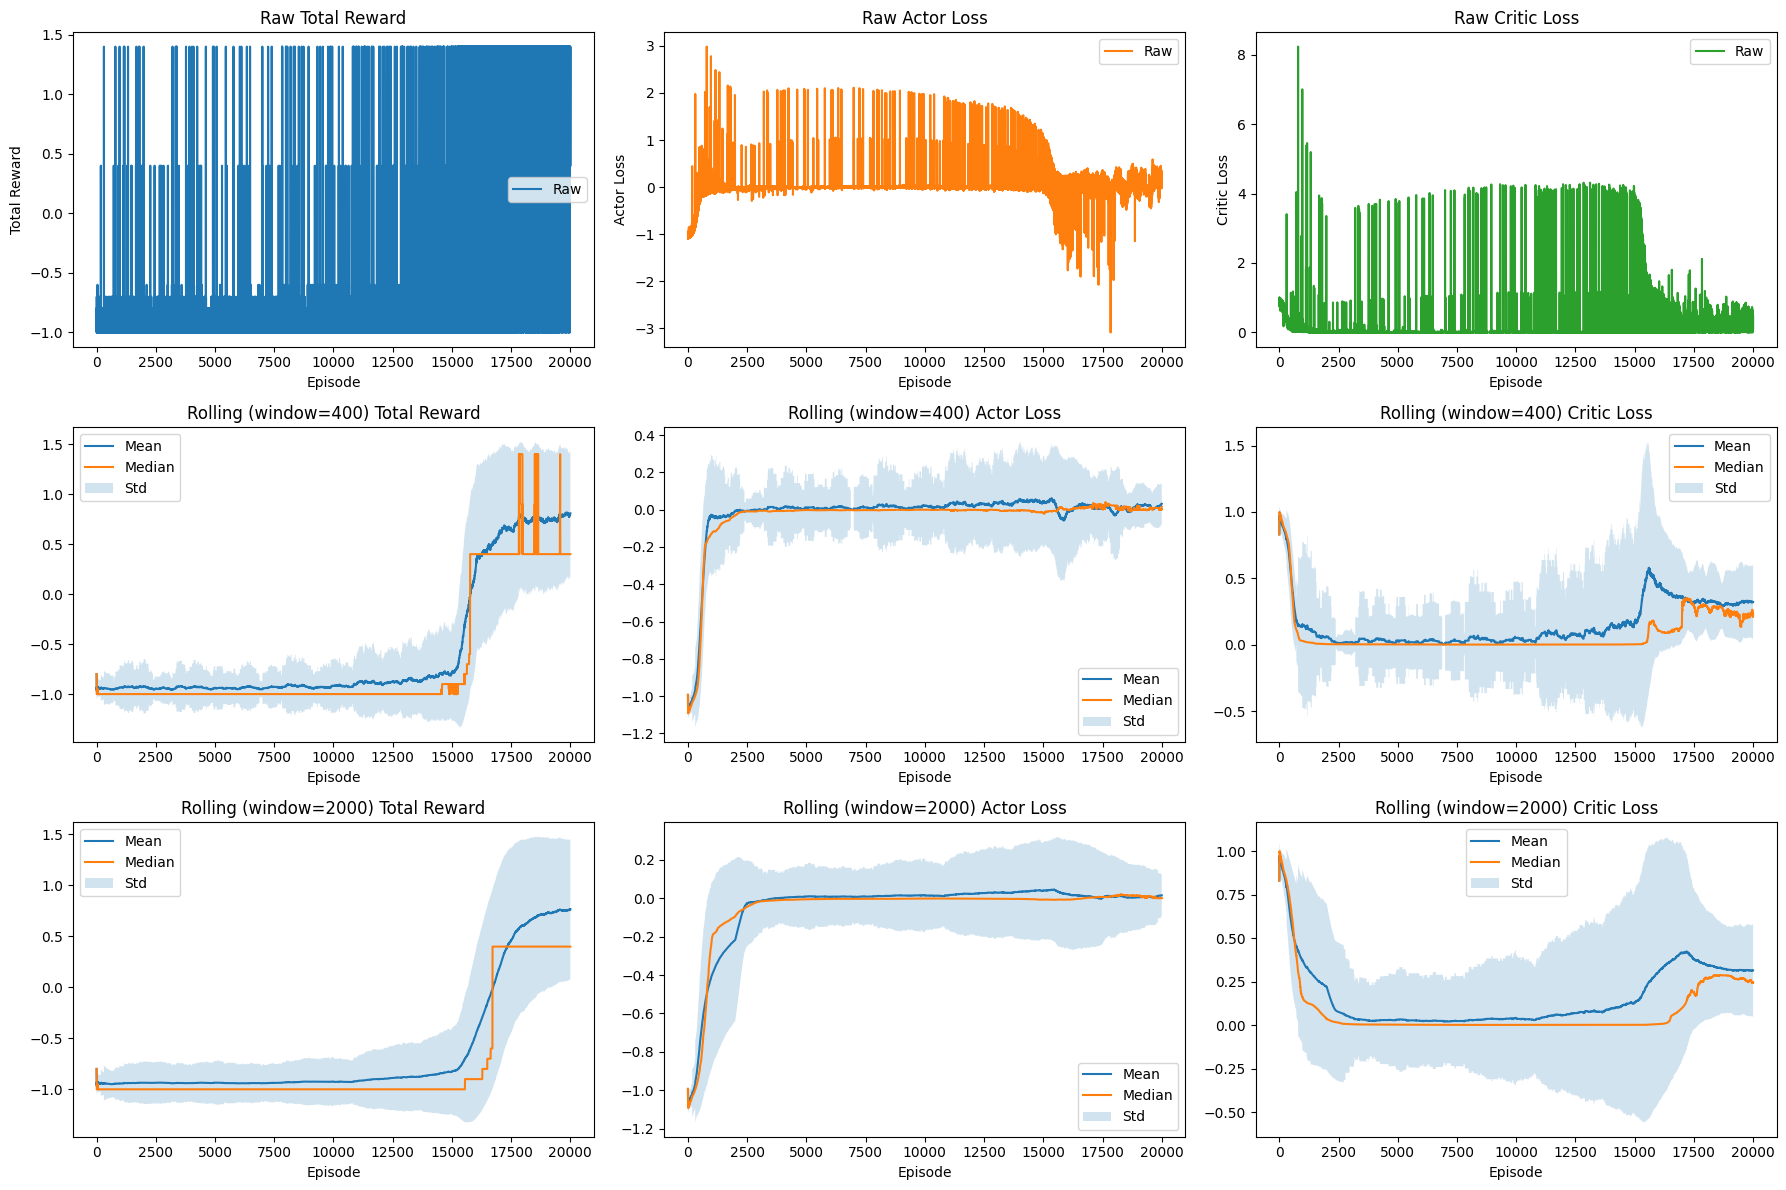

/mnt/c/Users/imcir/Desktop/CIENCIA DATOS/Segundo cuatrimestre/TFM/Código/Modules/helper_functions.py:937: RuntimeWarning: Mean of empty slice
  mean_rate_per_episode = np.nanmean(firing_rates, axis=0)


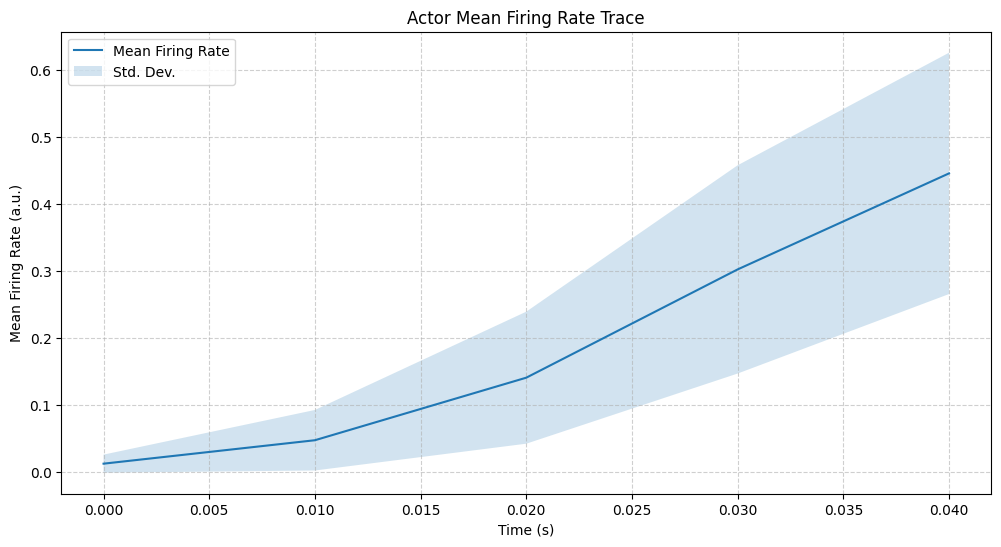


Closing the environment...
Environment closed.


In [2]:
def main():
    # --- Training Configuration ---
    config = {
        "dt": 10,
        "reward_correct": 1.0,
        "reward_incorrect": 0.0,
        "reward_aborted": -1.0,
        "input_noise_sigma": 0.01,
        "reward_fixation": 0.1,
        "reward_decide_fixation": -0.1,
        "duration_params": [10, 10, 10, 10, 10, 10], 
        "actor_hidden_size": 150,
        "critic_hidden_size": 150,
        "actor_layers": 1,
        "critic_layers": 1,
        "layer_type": "GRU_modified",
        "actor_lr": 1e-4,
        "critic_lr": 1e-4,
        "num_episodes": 20000,
        "gamma": 1.0,
        "l2_actor": 1e-4,
        "l2_critic": 1e-4,
        "print_interval": 100,
        "record_history": True
    }

    print("Configuration loaded:")
    for key, value in config.items():
        print(f"  {key}: {value}")

    # --- Configuración del Entorno ---
    print("\nCreating WorkingMemory environment...")
    env = WorkingMemoryEnv(
        dt=config["dt"],
        reward_correct=config["reward_correct"],
        reward_incorrect=config["reward_incorrect"],
        reward_aborted=config["reward_aborted"],
        reward_fixation=config["reward_fixation"],
        reward_decide_fixation=config["reward_decide_fixation"],
        input_noise_sigma=config["input_noise_sigma"],
        duration_params=config["duration_params"]
    )
    obs_size = env.observation_space.shape[0]
    act_size = env.action_space.n
    print(f"Observation size: {obs_size}, Action size: {act_size}")

    # --- Configuración del Agente ---
    print("\nInitializing Actor-Critic Agent...")
    agent = ActorCriticAgent(
        obs_size=obs_size,
        act_size=act_size,
        actor_hidden_size=config["actor_hidden_size"],
        critic_hidden_size=config["critic_hidden_size"],
        actor_layers=config["actor_layers"],
        critic_layers=config["critic_layers"],
        actor_lr=config["actor_lr"],
        critic_lr=config["critic_lr"],
        layer_type=config["layer_type"]
    )
    print("Agent Initialized.")

    # --- Entrenamiento ---
    print(f"\nStarting training for {config['num_episodes']} episodes...")
    total_rewards_history, actor_loss_history, critic_loss_history, actor_firing_rates, critic_firing_rates, other_measurements = train_agent(
        env=env,
        agent=agent,
        num_episodes=config["num_episodes"],
        gamma=config["gamma"],
        print_interval=config["print_interval"],
        l2_actor=config["l2_actor"],
        l2_critic=config["l2_critic"],
        record_history=config["record_history"]
    )
    print("\nTraining finished.")

    # --- Guardar checkpoint del modelo ---
    this_stage = 1
    this_ckpt_dir = 'checkpoints/WM+_F_rnn'
    save_model(agent, this_stage, this_ckpt_dir)

    # --- Save outputs ---
    output_dir  = Path.cwd() / "outputs"
    output_dir.mkdir(parents=True, exist_ok=True)
    output_file = output_dir / "WM+_F_rnn.pkl"
    with open(output_file, "wb") as f:
        pickle.dump((
            total_rewards_history,
            actor_loss_history,
            critic_loss_history,
            actor_firing_rates,
            critic_firing_rates,
            other_measurements
        ), f)
    print(f"Training history saved to {output_file}")
        
    # --- Graficar Métricas de Entrenamiento y Rendimiento ---
    print("\nPlotting results...")
    
    plot_metrics(
        total_rewards_history,
        actor_loss_history,
        critic_loss_history,
        window_1=max(20, config["num_episodes"] // 50),
        window_2=max(50, config["num_episodes"] // 10)
    )

    plot_mean_firing_rate_trace(
        actor_firing_rates,
        dt=config['dt'],
        title="Actor Mean Firing Rate Trace"
    )

    # --- Cerrar el Entorno ---
    print("\nClosing the environment...")
    env.close()
    print("Environment closed.")


if __name__ == '__main__':
    main()

Configuration loaded:
  dt: 10
  reward_correct: 1.0
  reward_incorrect: 0.0
  reward_aborted: -1.0
  input_noise_sigma: 0.01
  reward_fixation: 0.1
  reward_decide_fixation: -0.1
  duration_params: [10, 10, 10, 10, 10, 10]
  actor_hidden_size: 150
  critic_hidden_size: 150
  actor_layers: 1
  critic_layers: 1
  layer_type: GRU_modified
  actor_lr: 0.0001
  critic_lr: 0.0001
  num_episodes: 10000
  gamma: 1.0
  l2_actor: 0.0001
  l2_critic: 0.0001
  print_interval: 100
  record_history: True

Creating WorkingMemory environment...
Observation size: 3, Action size: 3

Initializing Actor-Critic Agent...
Agent Initialized.
Actor and Critic networks built.
Performing dummy forward to build cells and weights for mask loading...
Loading masks from stage 1...
Masks loaded.
Initializing optimizers with dummy step...


/mnt/c/Users/imcir/Desktop/CIENCIA DATOS/cienciadatosenv/lib/python3.12/site-packages/keras/src/layers/layer.py:396: UserWarning: `build()` was called on layer 'actor_model_1', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/mnt/c/Users/imcir/Desktop/CIENCIA DATOS/cienciadatosenv/lib/python3.12/site-packages/keras/src/layers/layer.py:396: UserWarning: `build()` was called on layer 'critic_model_1', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


Optimizers initialized.
Restoring from checkpoint: checkpoints/WM+_F_rnn_1/ckpt-1
Checkpoint restored successfully.

Starting training for 10000 episodes...
Episode 100	Total Reward: 1.40	State [0. 0. 0.]	Actor Loss: 0.0201	Critic Loss: 0.7387	Actions: [0, 0, 0, 0, 1]	M: N/A	Tau: N/A	
Episode 200	Total Reward: 1.40	State [0. 0. 0.]	Actor Loss: 0.0114	Critic Loss: 0.2837	Actions: [0, 0, 0, 0, 1]	M: N/A	Tau: N/A	
Episode 300	Total Reward: 0.40	State [0. 0. 0.]	Actor Loss: -0.0082	Critic Loss: 0.2000	Actions: [0, 0, 0, 0, 1]	M: N/A	Tau: N/A	
Episode 400	Total Reward: 1.40	State [0. 0. 0.]	Actor Loss: 0.0129	Critic Loss: 0.4910	Actions: [0, 0, 0, 0, 1]	M: N/A	Tau: N/A	
Episode 500	Total Reward: 0.40	State [0. 0. 0.]	Actor Loss: -0.0005	Critic Loss: 0.0113	Actions: [0, 0, 0, 0, 1]	M: N/A	Tau: N/A	
Episode 600	Total Reward: 1.40	State [0. 0. 0.]	Actor Loss: 0.0116	Critic Loss: 0.7099	Actions: [0, 0, 0, 0, 1]	M: N/A	Tau: N/A	
Episode 700	Total Reward: 1.40	State [0. 0. 0.]	Actor Loss: 0.0070	

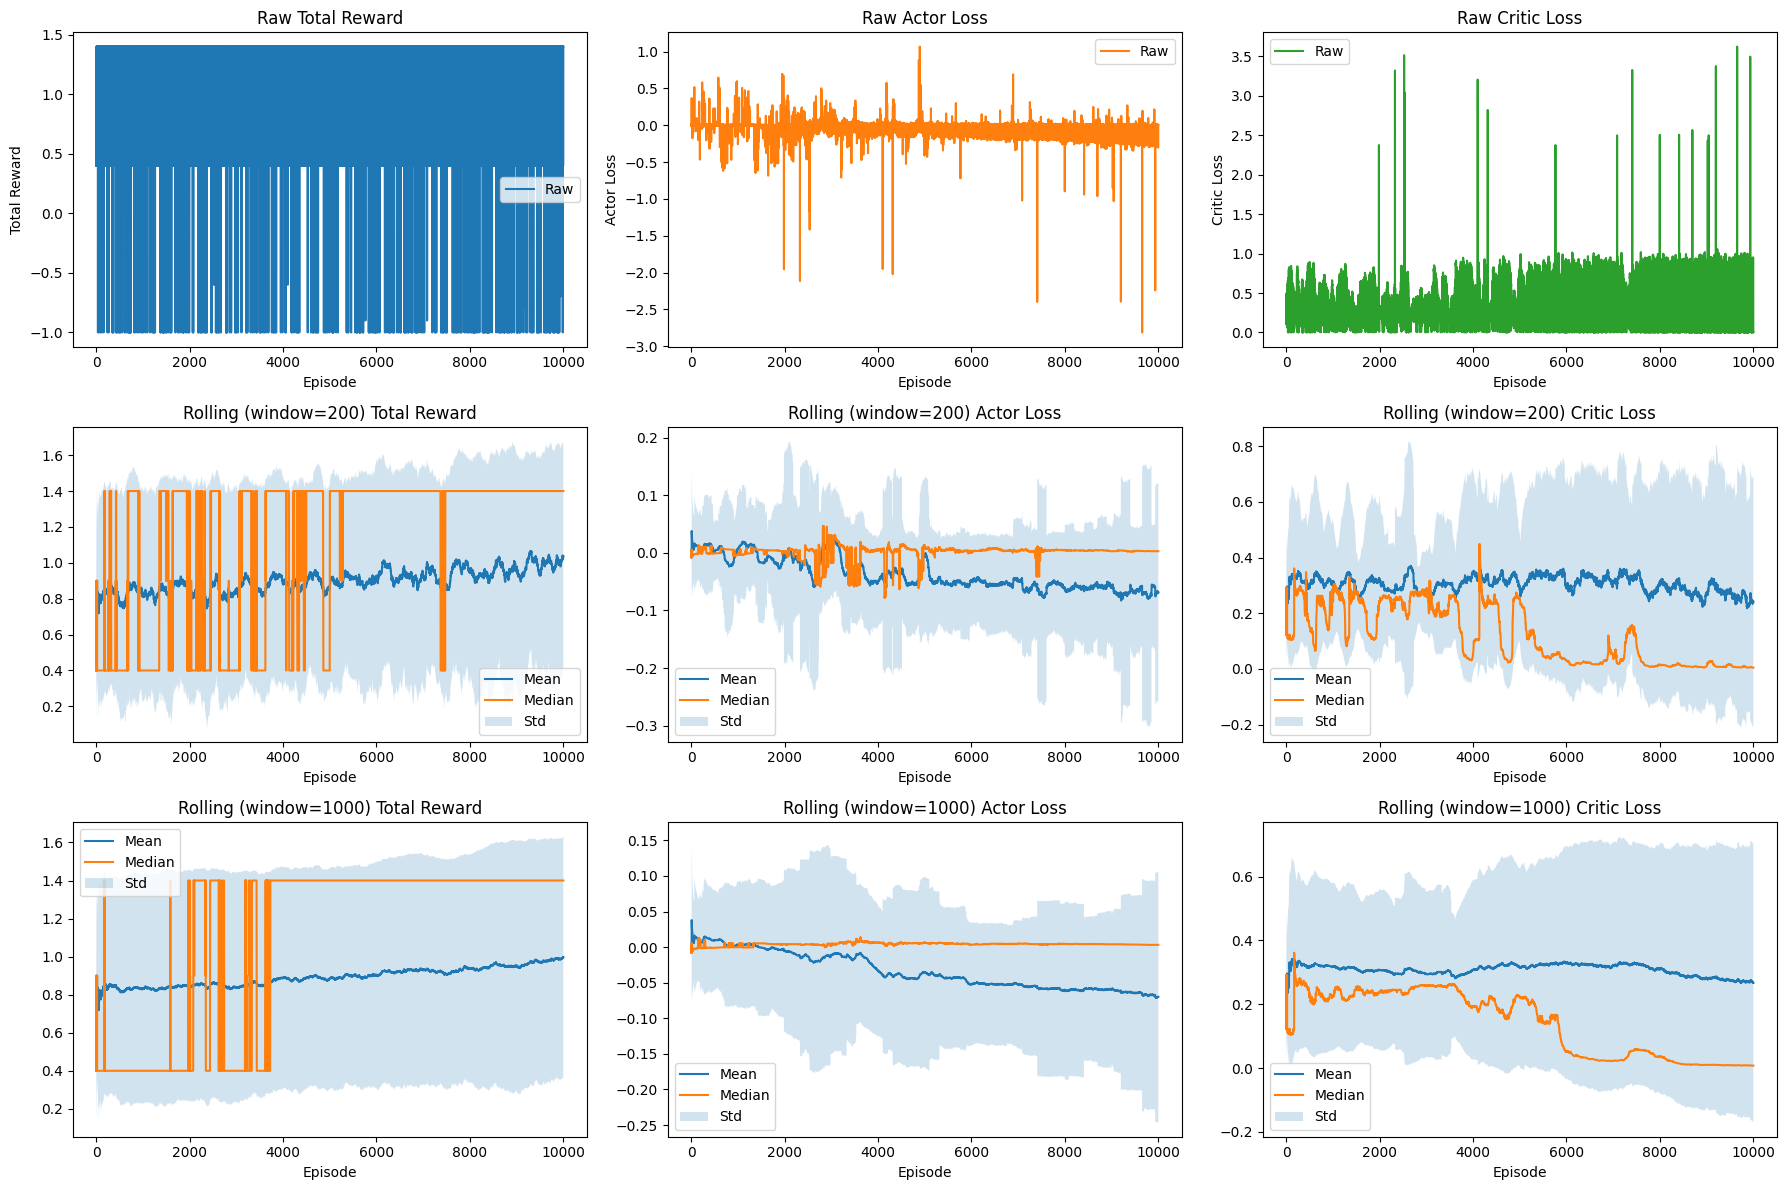

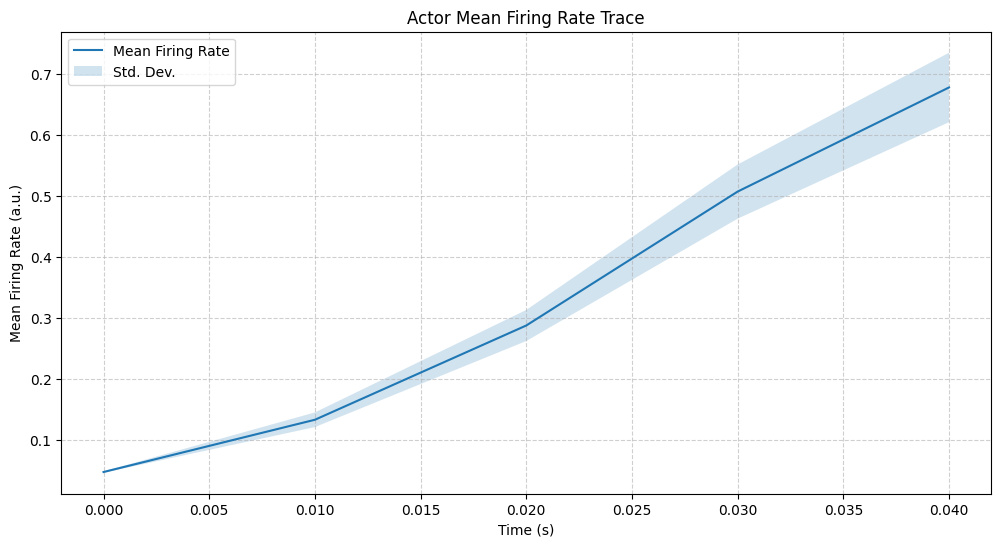


Closing the environment...
Environment closed.


In [3]:
def main():
    # --- Training Configuration ---
    config = {
        "dt": 10,
        "reward_correct": 1.0,
        "reward_incorrect": 0.0,
        "reward_aborted": -1.0,
        "input_noise_sigma": 0.01,
        "reward_fixation": 0.1,
        "reward_decide_fixation": -0.1,
        "duration_params": [10, 10, 10, 10, 10, 10], 
        "actor_hidden_size": 150,
        "critic_hidden_size": 150,
        "actor_layers": 1,
        "critic_layers": 1,
        "layer_type": "GRU_modified",
        "actor_lr": 1e-4,
        "critic_lr": 1e-4,
        "num_episodes": 10000,
        "gamma": 1.0,
        "l2_actor": 1e-4,
        "l2_critic": 1e-4,
        "print_interval": 100,
        "record_history": True
    }

    print("Configuration loaded:")
    for key, value in config.items():
        print(f"  {key}: {value}")

    # --- Configuración del Entorno ---
    print("\nCreating WorkingMemory environment...")
    env = WorkingMemoryEnv(
        dt=config["dt"],
        reward_correct=config["reward_correct"],
        reward_incorrect=config["reward_incorrect"],
        reward_aborted=config["reward_aborted"],
        reward_fixation=config["reward_fixation"],
        reward_decide_fixation=config["reward_decide_fixation"],
        input_noise_sigma=config["input_noise_sigma"],
        duration_params=config["duration_params"]
    )
    obs_size = env.observation_space.shape[0]
    act_size = env.action_space.n
    print(f"Observation size: {obs_size}, Action size: {act_size}")

    # --- Configuración del Agente ---
    print("\nInitializing Actor-Critic Agent...")
    agent = ActorCriticAgent(
        obs_size=obs_size,
        act_size=act_size,
        actor_hidden_size=config["actor_hidden_size"],
        critic_hidden_size=config["critic_hidden_size"],
        actor_layers=config["actor_layers"],
        critic_layers=config["critic_layers"],
        actor_lr=config["actor_lr"],
        critic_lr=config["critic_lr"],
        layer_type=config["layer_type"]
    )
    print("Agent Initialized.")

    # --- Load checkpoint ---
    this_stage = 2
    this_ckpt_dir = 'checkpoints/WM+_F_rnn'
    load_model(agent, obs_size, act_size, this_stage, this_ckpt_dir)

    # --- Entrenamiento ---
    print(f"\nStarting training for {config['num_episodes']} episodes...")
    total_rewards_history, actor_loss_history, critic_loss_history, actor_firing_rates, critic_firing_rates, other_measurements = train_agent(
        env=env,
        agent=agent,
        num_episodes=config["num_episodes"],
        gamma=config["gamma"],
        print_interval=config["print_interval"],
        l2_actor=config["l2_actor"],
        l2_critic=config["l2_critic"],
        record_history=config["record_history"]
    )
    print("\nTraining finished.")

    # --- Guardar checkpoint del modelo ---
    this_stage = 2
    this_ckpt_dir = 'checkpoints/WM+_F_rnn'
    save_model(agent, this_stage, this_ckpt_dir)

    # --- Save outputs ---
    output_dir  = Path.cwd() / "outputs"
    output_dir.mkdir(parents=True, exist_ok=True)
    output_file = output_dir / "WM+_F_rnn_2.pkl"
    with open(output_file, "wb") as f:
        pickle.dump((
            total_rewards_history,
            actor_loss_history,
            critic_loss_history,
            actor_firing_rates,
            critic_firing_rates,
            other_measurements
        ), f)
    print(f"Training history saved to {output_file}")
        
    # --- Graficar Métricas de Entrenamiento y Rendimiento ---
    print("\nPlotting results...")
    
    plot_metrics(
        total_rewards_history,
        actor_loss_history,
        critic_loss_history,
        window_1=max(20, config["num_episodes"] // 50),
        window_2=max(50, config["num_episodes"] // 10)
    )

    plot_mean_firing_rate_trace(
        actor_firing_rates,
        dt=config['dt'],
        title="Actor Mean Firing Rate Trace"
    )

    # --- Cerrar el Entorno ---
    print("\nClosing the environment...")
    env.close()
    print("Environment closed.")


if __name__ == '__main__':
    main()

Configuration loaded:
  dt: 10
  reward_correct: 1.0
  reward_incorrect: 0.0
  reward_aborted: -1.0
  input_noise_sigma: 0.01
  reward_fixation: 0.1
  reward_decide_fixation: -0.1
  duration_params: [10, 10, 10, 10, 10, 10]
  actor_hidden_size: 150
  critic_hidden_size: 150
  actor_layers: 1
  critic_layers: 1
  layer_type: GRU_modified
  actor_lr: 0.0001
  critic_lr: 0.0001
  num_episodes: 10000
  gamma: 1.0
  l2_actor: 0.0001
  l2_critic: 0.0001
  print_interval: 100
  record_history: True

Creating WorkingMemory environment...
Observation size: 3, Action size: 3

Initializing Actor-Critic Agent...
Agent Initialized.
Actor and Critic networks built.
Performing dummy forward to build cells and weights for mask loading...
Loading masks from stage 2...
Masks loaded.
Initializing optimizers with dummy step...


/mnt/c/Users/imcir/Desktop/CIENCIA DATOS/cienciadatosenv/lib/python3.12/site-packages/keras/src/layers/layer.py:396: UserWarning: `build()` was called on layer 'actor_model_1', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/mnt/c/Users/imcir/Desktop/CIENCIA DATOS/cienciadatosenv/lib/python3.12/site-packages/keras/src/layers/layer.py:396: UserWarning: `build()` was called on layer 'critic_model_1', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


Optimizers initialized.
Restoring from checkpoint: checkpoints/WM+_F_rnn_2/ckpt-1
Checkpoint restored successfully.

Starting training for 10000 episodes...
Episode 100	Total Reward: 1.40	State [0. 0. 0.]	Actor Loss: 0.0080	Critic Loss: 0.0094	Actions: [0, 0, 0, 0, 2]	M: N/A	Tau: N/A	
Episode 200	Total Reward: 0.40	State [0. 0. 0.]	Actor Loss: -0.2356	Critic Loss: 0.8465	Actions: [0, 0, 0, 0, 1]	M: N/A	Tau: N/A	
Episode 300	Total Reward: 0.40	State [0. 0. 0.]	Actor Loss: -0.3318	Critic Loss: 0.9849	Actions: [0, 0, 0, 0, 2]	M: N/A	Tau: N/A	
Episode 400	Total Reward: 1.40	State [0. 0. 0.]	Actor Loss: 0.0001	Critic Loss: 0.0015	Actions: [0, 0, 0, 0, 1]	M: N/A	Tau: N/A	
Episode 500	Total Reward: 1.40	State [0. 0. 0.]	Actor Loss: 0.0058	Critic Loss: 0.0112	Actions: [0, 0, 0, 0, 2]	M: N/A	Tau: N/A	
Episode 600	Total Reward: 1.40	State [0. 0. 0.]	Actor Loss: -0.0005	Critic Loss: 0.0029	Actions: [0, 0, 0, 0, 1]	M: N/A	Tau: N/A	
Episode 700	Total Reward: 1.40	State [0. 0. 0.]	Actor Loss: 0.0021

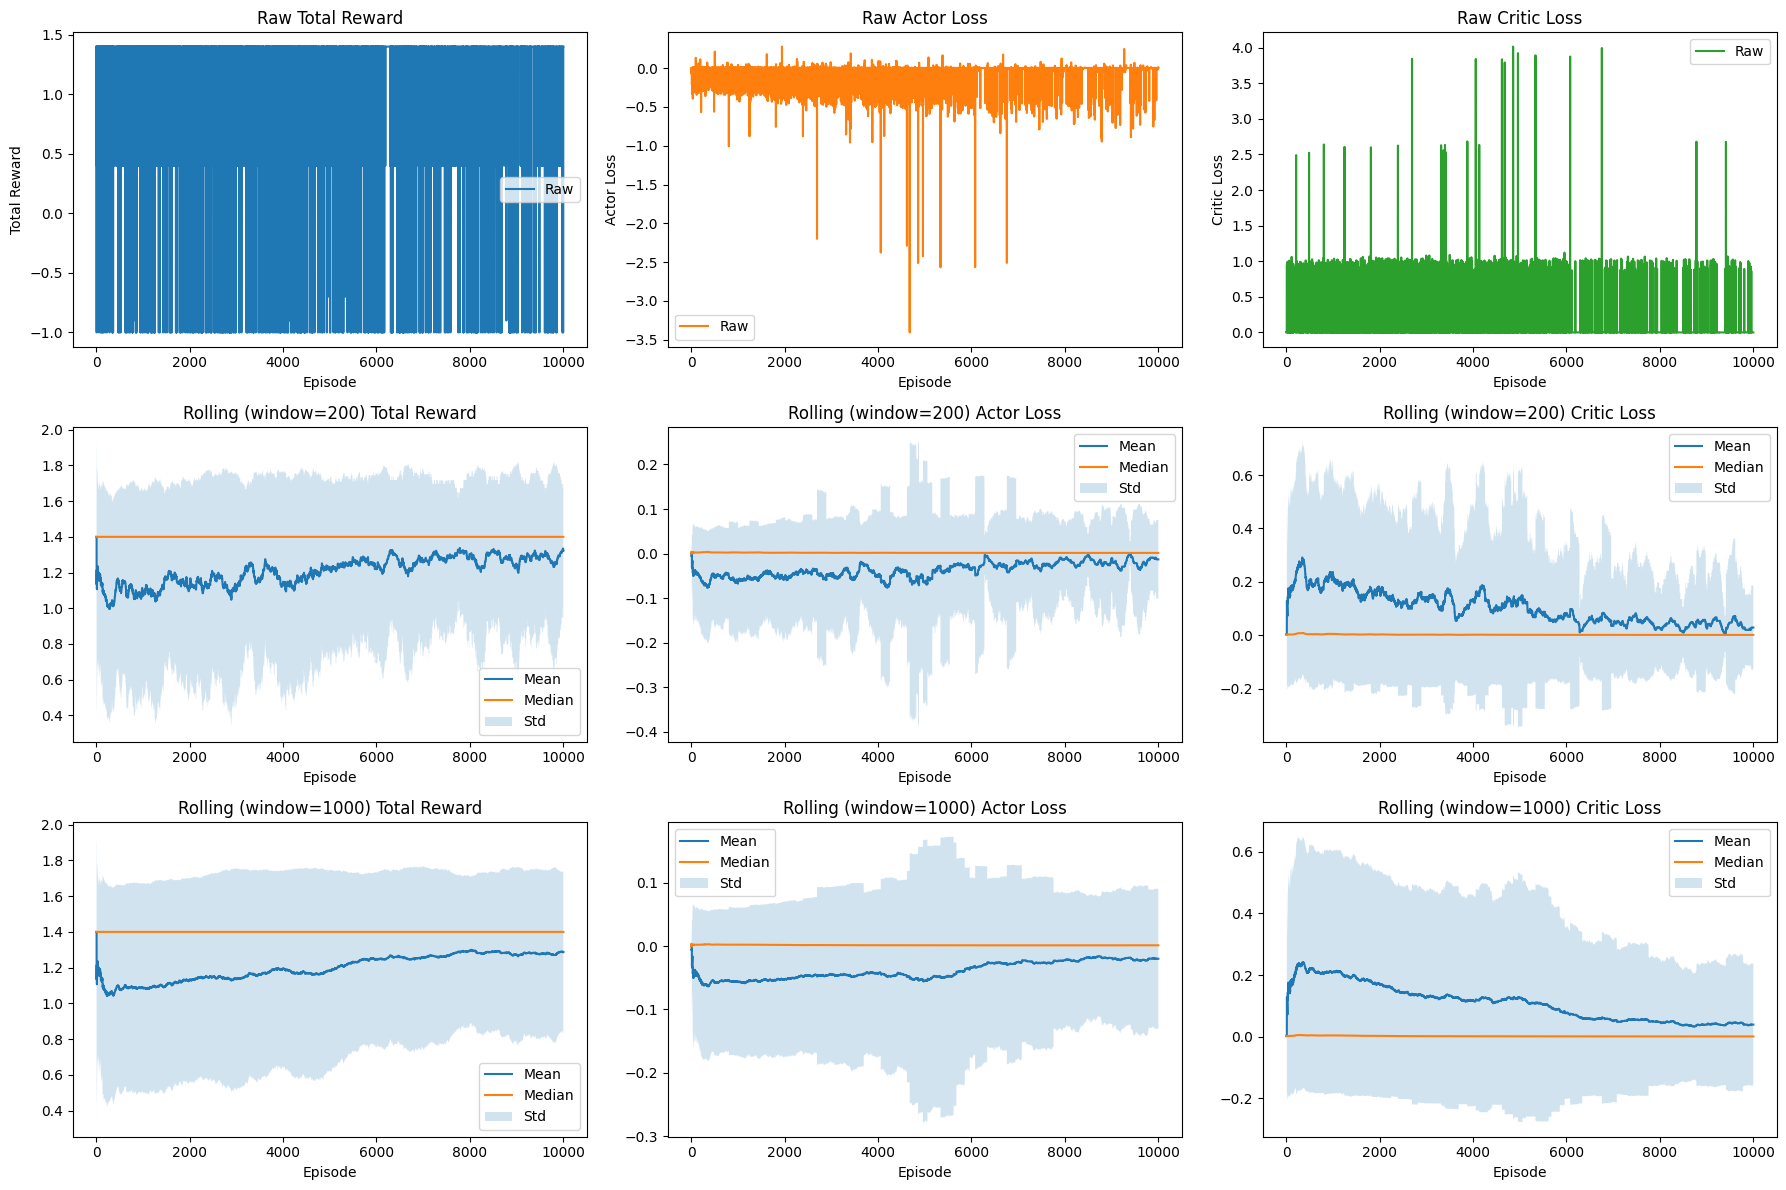

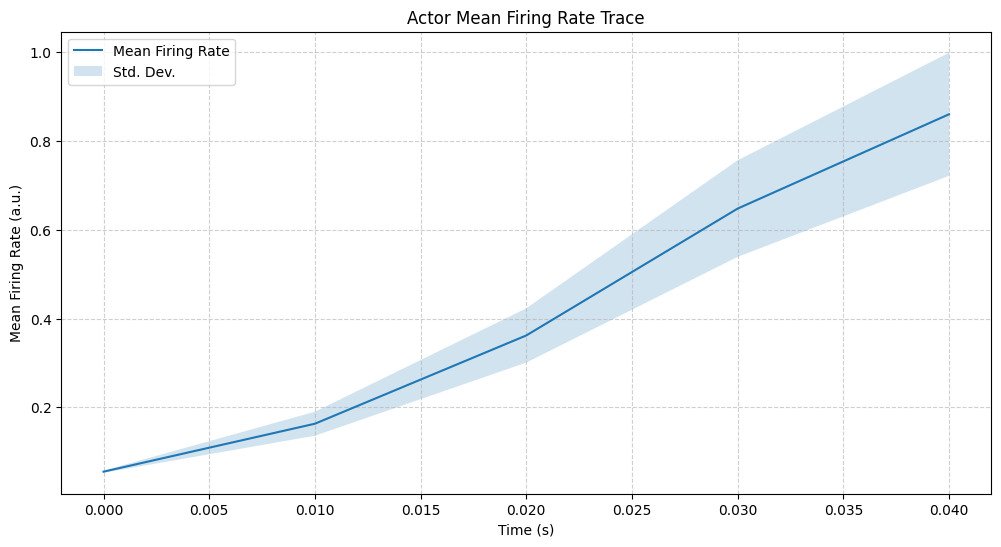


Closing the environment...
Environment closed.


In [3]:
def main():
    # --- Training Configuration ---
    config = {
        "dt": 10,
        "reward_correct": 1.0,
        "reward_incorrect": 0.0,
        "reward_aborted": -1.0,
        "input_noise_sigma": 0.01,
        "reward_fixation": 0.1,
        "reward_decide_fixation": -0.1,
        "duration_params": [10, 10, 10, 10, 10, 10], 
        "actor_hidden_size": 150,
        "critic_hidden_size": 150,
        "actor_layers": 1,
        "critic_layers": 1,
        "layer_type": "GRU_modified",
        "actor_lr": 1e-4,
        "critic_lr": 1e-4,
        "num_episodes": 10000,
        "gamma": 1.0,
        "l2_actor": 1e-4,
        "l2_critic": 1e-4,
        "print_interval": 100,
        "record_history": True
    }

    print("Configuration loaded:")
    for key, value in config.items():
        print(f"  {key}: {value}")

    # --- Configuración del Entorno ---
    print("\nCreating WorkingMemory environment...")
    env = WorkingMemoryEnv(
        dt=config["dt"],
        reward_correct=config["reward_correct"],
        reward_incorrect=config["reward_incorrect"],
        reward_aborted=config["reward_aborted"],
        reward_fixation=config["reward_fixation"],
        reward_decide_fixation=config["reward_decide_fixation"],
        input_noise_sigma=config["input_noise_sigma"],
        duration_params=config["duration_params"]
    )
    obs_size = env.observation_space.shape[0]
    act_size = env.action_space.n
    print(f"Observation size: {obs_size}, Action size: {act_size}")

    # --- Configuración del Agente ---
    print("\nInitializing Actor-Critic Agent...")
    agent = ActorCriticAgent(
        obs_size=obs_size,
        act_size=act_size,
        actor_hidden_size=config["actor_hidden_size"],
        critic_hidden_size=config["critic_hidden_size"],
        actor_layers=config["actor_layers"],
        critic_layers=config["critic_layers"],
        actor_lr=config["actor_lr"],
        critic_lr=config["critic_lr"],
        layer_type=config["layer_type"]
    )
    print("Agent Initialized.")

    # --- Load checkpoint ---
    this_stage = 3
    this_ckpt_dir = 'checkpoints/WM+_F_rnn'
    load_model(agent, obs_size, act_size, this_stage, this_ckpt_dir)

    # --- Entrenamiento ---
    print(f"\nStarting training for {config['num_episodes']} episodes...")
    total_rewards_history, actor_loss_history, critic_loss_history, actor_firing_rates, critic_firing_rates, other_measurements = train_agent(
        env=env,
        agent=agent,
        num_episodes=config["num_episodes"],
        gamma=config["gamma"],
        print_interval=config["print_interval"],
        l2_actor=config["l2_actor"],
        l2_critic=config["l2_critic"],
        record_history=config["record_history"]
    )
    print("\nTraining finished.")

    # --- Guardar checkpoint del modelo ---
    this_stage = 3
    this_ckpt_dir = 'checkpoints/WM+_F_rnn'
    save_model(agent, this_stage, this_ckpt_dir)

    # --- Save outputs ---
    output_dir  = Path.cwd() / "outputs"
    output_dir.mkdir(parents=True, exist_ok=True)
    output_file = output_dir / "WM+_F_rnn_3.pkl"
    with open(output_file, "wb") as f:
        pickle.dump((
            total_rewards_history,
            actor_loss_history,
            critic_loss_history,
            actor_firing_rates,
            critic_firing_rates,
            other_measurements
        ), f)
    print(f"Training history saved to {output_file}")
        
    # --- Graficar Métricas de Entrenamiento y Rendimiento ---
    print("\nPlotting results...")
    
    plot_metrics(
        total_rewards_history,
        actor_loss_history,
        critic_loss_history,
        window_1=max(20, config["num_episodes"] // 50),
        window_2=max(50, config["num_episodes"] // 10)
    )

    plot_mean_firing_rate_trace(
        actor_firing_rates,
        dt=config['dt'],
        title="Actor Mean Firing Rate Trace"
    )

    # --- Cerrar el Entorno ---
    print("\nClosing the environment...")
    env.close()
    print("Environment closed.")


if __name__ == '__main__':
    main()

Configuration loaded:
  dt: 10
  reward_correct: 1.0
  reward_incorrect: 0.0
  reward_aborted: -1.0
  input_noise_sigma: 0.01
  reward_fixation: 0.1
  reward_decide_fixation: -0.1
  duration_params: [10, 10, 10, 10, 10, 10]
  actor_hidden_size: 150
  critic_hidden_size: 150
  actor_layers: 1
  critic_layers: 1
  layer_type: GRU_modified
  actor_lr: 0.0001
  critic_lr: 0.0001
  num_episodes: 5000
  gamma: 1.0
  l2_actor: 0.0001
  l2_critic: 0.0001
  print_interval: 100
  record_history: True

Creating WorkingMemory environment...
Observation size: 3, Action size: 3

Initializing Actor-Critic Agent...
Agent Initialized.
Actor and Critic networks built.
Performing dummy forward to build cells and weights for mask loading...
Loading masks from stage 3...
Masks loaded.
Initializing optimizers with dummy step...


/mnt/c/Users/imcir/Desktop/CIENCIA DATOS/cienciadatosenv/lib/python3.12/site-packages/keras/src/layers/layer.py:396: UserWarning: `build()` was called on layer 'actor_model_3', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/mnt/c/Users/imcir/Desktop/CIENCIA DATOS/cienciadatosenv/lib/python3.12/site-packages/keras/src/layers/layer.py:396: UserWarning: `build()` was called on layer 'critic_model_3', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


Optimizers initialized.
Restoring from checkpoint: checkpoints/WM+_F_rnn_3/ckpt-1
Checkpoint restored successfully.

Starting training for 5000 episodes...
Episode 100	Total Reward: 1.40	State [0. 0. 0.]	Actor Loss: 0.0013	Critic Loss: 0.0008	Actions: [0, 0, 0, 0, 2]	M: N/A	Tau: N/A	
Episode 200	Total Reward: 1.40	State [0. 0. 0.]	Actor Loss: 0.0015	Critic Loss: 0.0008	Actions: [0, 0, 0, 0, 2]	M: N/A	Tau: N/A	
Episode 300	Total Reward: 1.40	State [0. 0. 0.]	Actor Loss: 0.0014	Critic Loss: 0.0008	Actions: [0, 0, 0, 0, 1]	M: N/A	Tau: N/A	
Episode 400	Total Reward: 1.40	State [0. 0. 0.]	Actor Loss: 0.0015	Critic Loss: 0.0009	Actions: [0, 0, 0, 0, 2]	M: N/A	Tau: N/A	
Episode 500	Total Reward: 1.40	State [0. 0. 0.]	Actor Loss: 0.0012	Critic Loss: 0.0009	Actions: [0, 0, 0, 0, 1]	M: N/A	Tau: N/A	
Episode 600	Total Reward: 0.40	State [0. 0. 0.]	Actor Loss: -0.5083	Critic Loss: 0.8432	Actions: [0, 0, 0, 0, 1]	M: N/A	Tau: N/A	
Episode 700	Total Reward: 1.40	State [0. 0. 0.]	Actor Loss: 0.0016	Cr

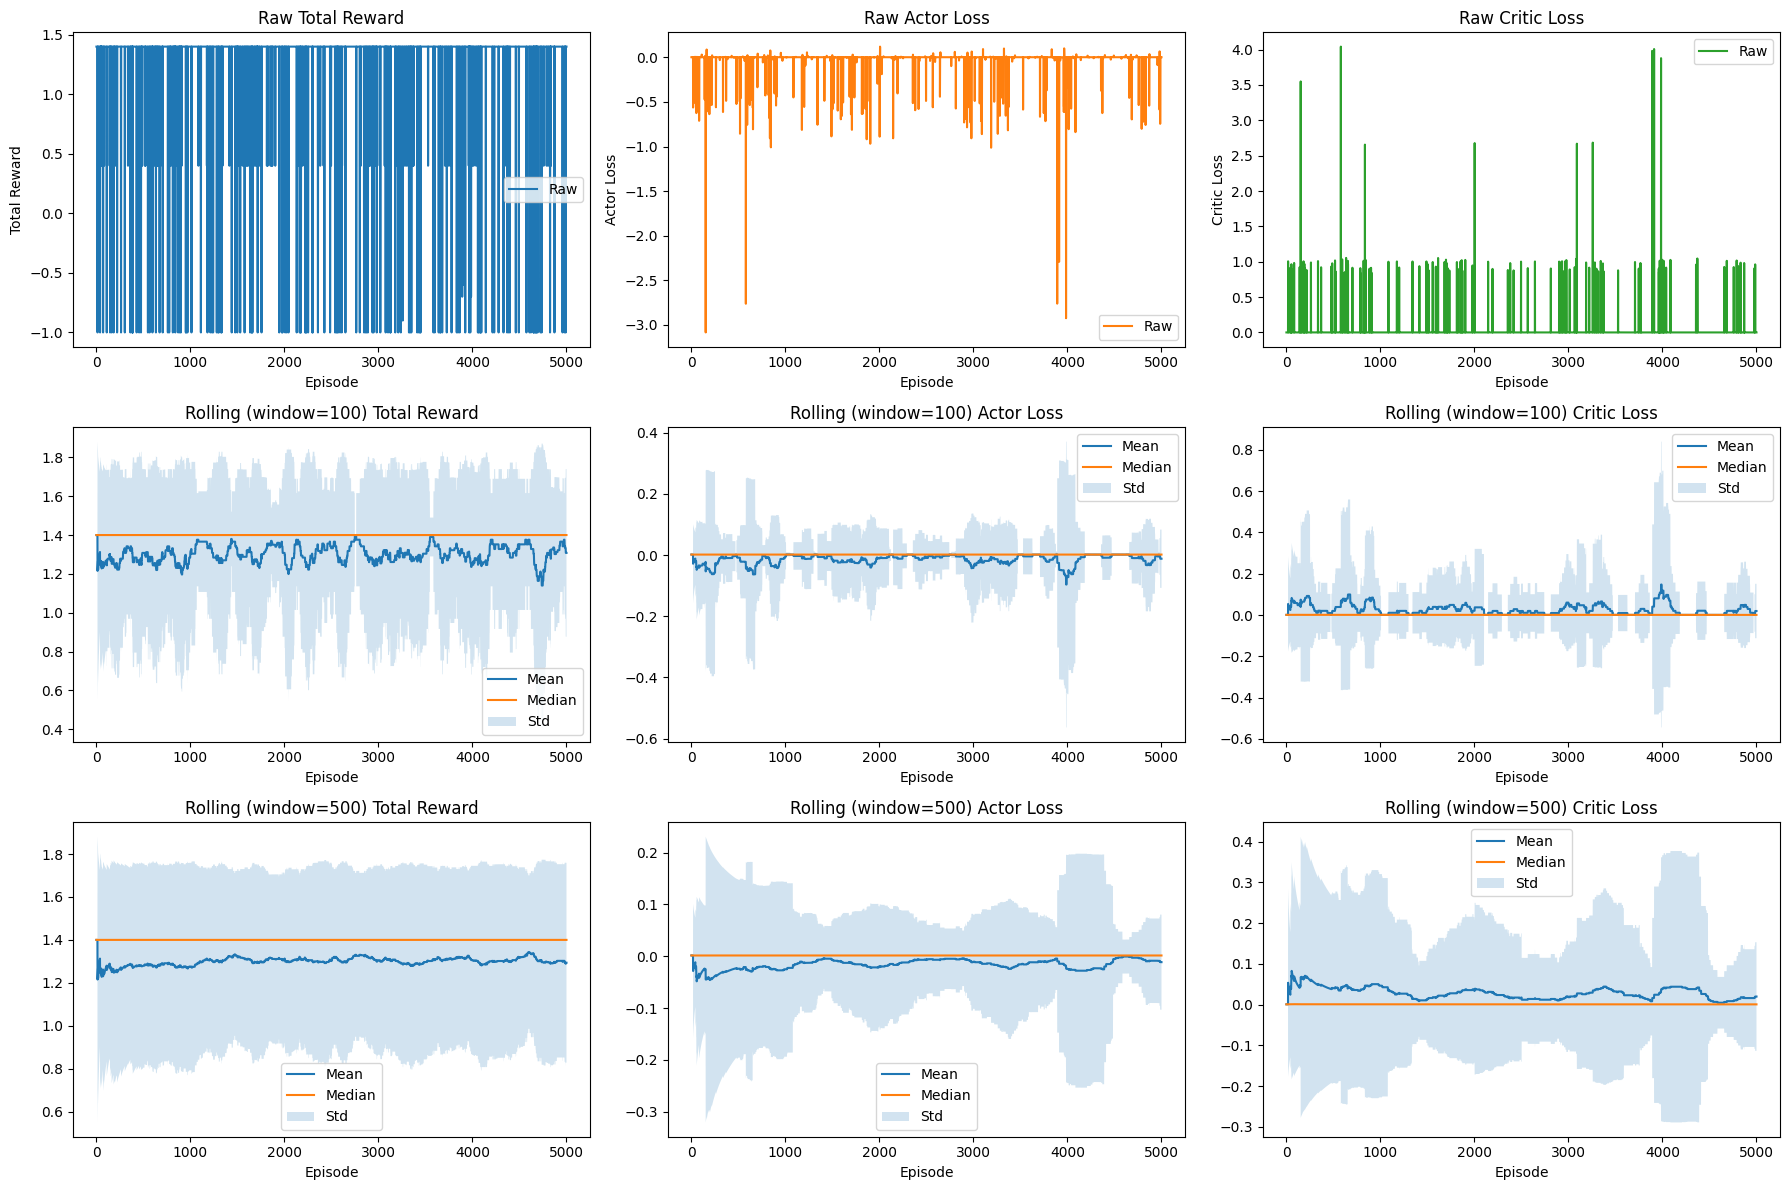

/mnt/c/Users/imcir/Desktop/CIENCIA DATOS/Segundo cuatrimestre/TFM/Código/Modules/helper_functions.py:937: RuntimeWarning: Mean of empty slice
  mean_rate_per_episode = np.nanmean(firing_rates, axis=0)


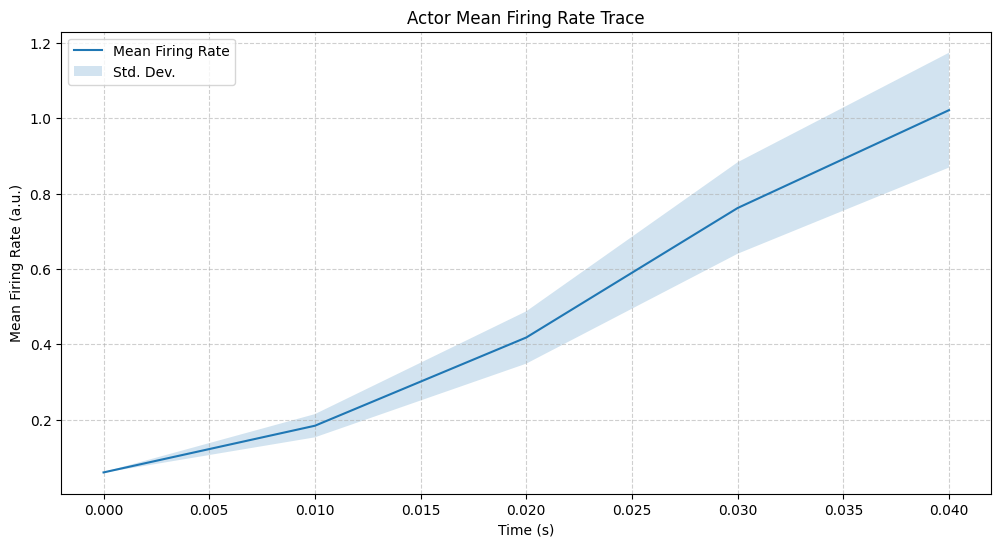


Closing the environment...
Environment closed.


In [5]:
def main():
    # --- Training Configuration ---
    config = {
        "dt": 10,
        "reward_correct": 1.0,
        "reward_incorrect": 0.0,
        "reward_aborted": -1.0,
        "input_noise_sigma": 0.01,
        "reward_fixation": 0.1,
        "reward_decide_fixation": -0.1,
        "duration_params": [10, 10, 10, 10, 10, 10], 
        "actor_hidden_size": 150,
        "critic_hidden_size": 150,
        "actor_layers": 1,
        "critic_layers": 1,
        "layer_type": "GRU_modified",
        "actor_lr": 1e-4,
        "critic_lr": 1e-4,
        "num_episodes": 5000,
        "gamma": 1.0,
        "l2_actor": 1e-4,
        "l2_critic": 1e-4,
        "print_interval": 100,
        "record_history": True
    }

    print("Configuration loaded:")
    for key, value in config.items():
        print(f"  {key}: {value}")

    # --- Configuración del Entorno ---
    print("\nCreating WorkingMemory environment...")
    env = WorkingMemoryEnv(
        dt=config["dt"],
        reward_correct=config["reward_correct"],
        reward_incorrect=config["reward_incorrect"],
        reward_aborted=config["reward_aborted"],
        reward_fixation=config["reward_fixation"],
        reward_decide_fixation=config["reward_decide_fixation"],
        input_noise_sigma=config["input_noise_sigma"],
        duration_params=config["duration_params"]
    )
    obs_size = env.observation_space.shape[0]
    act_size = env.action_space.n
    print(f"Observation size: {obs_size}, Action size: {act_size}")

    # --- Configuración del Agente ---
    print("\nInitializing Actor-Critic Agent...")
    agent = ActorCriticAgent(
        obs_size=obs_size,
        act_size=act_size,
        actor_hidden_size=config["actor_hidden_size"],
        critic_hidden_size=config["critic_hidden_size"],
        actor_layers=config["actor_layers"],
        critic_layers=config["critic_layers"],
        actor_lr=config["actor_lr"],
        critic_lr=config["critic_lr"],
        layer_type=config["layer_type"]
    )
    print("Agent Initialized.")

    # --- Load checkpoint ---
    this_stage = 4
    this_ckpt_dir = 'checkpoints/WM+_F_rnn'
    load_model(agent, obs_size, act_size, this_stage, this_ckpt_dir)

    # --- Entrenamiento ---
    print(f"\nStarting training for {config['num_episodes']} episodes...")
    total_rewards_history, actor_loss_history, critic_loss_history, actor_firing_rates, critic_firing_rates, other_measurements = train_agent(
        env=env,
        agent=agent,
        num_episodes=config["num_episodes"],
        gamma=config["gamma"],
        print_interval=config["print_interval"],
        l2_actor=config["l2_actor"],
        l2_critic=config["l2_critic"],
        record_history=config["record_history"]
    )
    print("\nTraining finished.")

    # --- Guardar checkpoint del modelo ---
    this_stage = 4
    this_ckpt_dir = 'checkpoints/WM+_F_rnn'
    save_model(agent, this_stage, this_ckpt_dir)

    # --- Save outputs ---
    output_dir  = Path.cwd() / "outputs"
    output_dir.mkdir(parents=True, exist_ok=True)
    output_file = output_dir / "WM+_F_rnn_4.pkl"
    with open(output_file, "wb") as f:
        pickle.dump((
            total_rewards_history,
            actor_loss_history,
            critic_loss_history,
            actor_firing_rates,
            critic_firing_rates,
            other_measurements
        ), f)
    print(f"Training history saved to {output_file}")
        
    # --- Graficar Métricas de Entrenamiento y Rendimiento ---
    print("\nPlotting results...")
    
    plot_metrics(
        total_rewards_history,
        actor_loss_history,
        critic_loss_history,
        window_1=max(20, config["num_episodes"] // 50),
        window_2=max(50, config["num_episodes"] // 10)
    )

    plot_mean_firing_rate_trace(
        actor_firing_rates,
        dt=config['dt'],
        title="Actor Mean Firing Rate Trace"
    )

    # --- Cerrar el Entorno ---
    print("\nClosing the environment...")
    env.close()
    print("Environment closed.")


if __name__ == '__main__':
    main()

Configuration loaded:
  dt: 10
  reward_correct: 1.0
  reward_incorrect: 0.0
  reward_aborted: -1.0
  input_noise_sigma: 0.15
  reward_fixation: 0.1
  reward_decide_fixation: -0.1
  duration_params: [10, 10, 10, 10, 10, 10]
  actor_hidden_size: 150
  critic_hidden_size: 150
  actor_layers: 1
  critic_layers: 1
  layer_type: GRU_modified
  actor_lr: 0.0001
  critic_lr: 0.0001
  num_episodes: 5000
  gamma: 1.0
  l2_actor: 0.0001
  l2_critic: 0.0001
  print_interval: 100
  record_history: True

Creating WorkingMemory environment...
Observation size: 3, Action size: 3

Initializing Actor-Critic Agent...
Agent Initialized.
Actor and Critic networks built.
Performing dummy forward to build cells and weights for mask loading...
Loading masks from stage 4...
Masks loaded.
Initializing optimizers with dummy step...


/mnt/c/Users/imcir/Desktop/CIENCIA DATOS/cienciadatosenv/lib/python3.12/site-packages/keras/src/layers/layer.py:396: UserWarning: `build()` was called on layer 'actor_model_3', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/mnt/c/Users/imcir/Desktop/CIENCIA DATOS/cienciadatosenv/lib/python3.12/site-packages/keras/src/layers/layer.py:396: UserWarning: `build()` was called on layer 'critic_model_3', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


Optimizers initialized.
Restoring from checkpoint: checkpoints/WM+_F_rnn_4/ckpt-1
Checkpoint restored successfully.

Starting training for 5000 episodes...
Episode 100	Total Reward: 1.40	State [0. 0. 0.]	Actor Loss: 0.0015	Critic Loss: 0.0008	Actions: [0, 0, 0, 0, 2]	M: N/A	Tau: N/A	
Episode 200	Total Reward: 1.40	State [0. 0. 0.]	Actor Loss: 0.0018	Critic Loss: 0.0020	Actions: [0, 0, 0, 0, 2]	M: N/A	Tau: N/A	
Episode 300	Total Reward: 1.40	State [0. 0. 0.]	Actor Loss: 0.0015	Critic Loss: 0.0011	Actions: [0, 0, 0, 0, 1]	M: N/A	Tau: N/A	
Episode 400	Total Reward: 1.40	State [0. 0. 0.]	Actor Loss: 0.0017	Critic Loss: 0.0028	Actions: [0, 0, 0, 0, 2]	M: N/A	Tau: N/A	
Episode 500	Total Reward: -1.00	State [1. 0. 0.]	Actor Loss: 0.1294	Critic Loss: 0.0020	Actions: [2]	M: N/A	Tau: N/A	
Episode 600	Total Reward: 1.40	State [0. 0. 0.]	Actor Loss: 0.0014	Critic Loss: 0.0006	Actions: [0, 0, 0, 0, 1]	M: N/A	Tau: N/A	
Episode 700	Total Reward: 1.40	State [0. 0. 0.]	Actor Loss: 0.0016	Critic Loss: 0

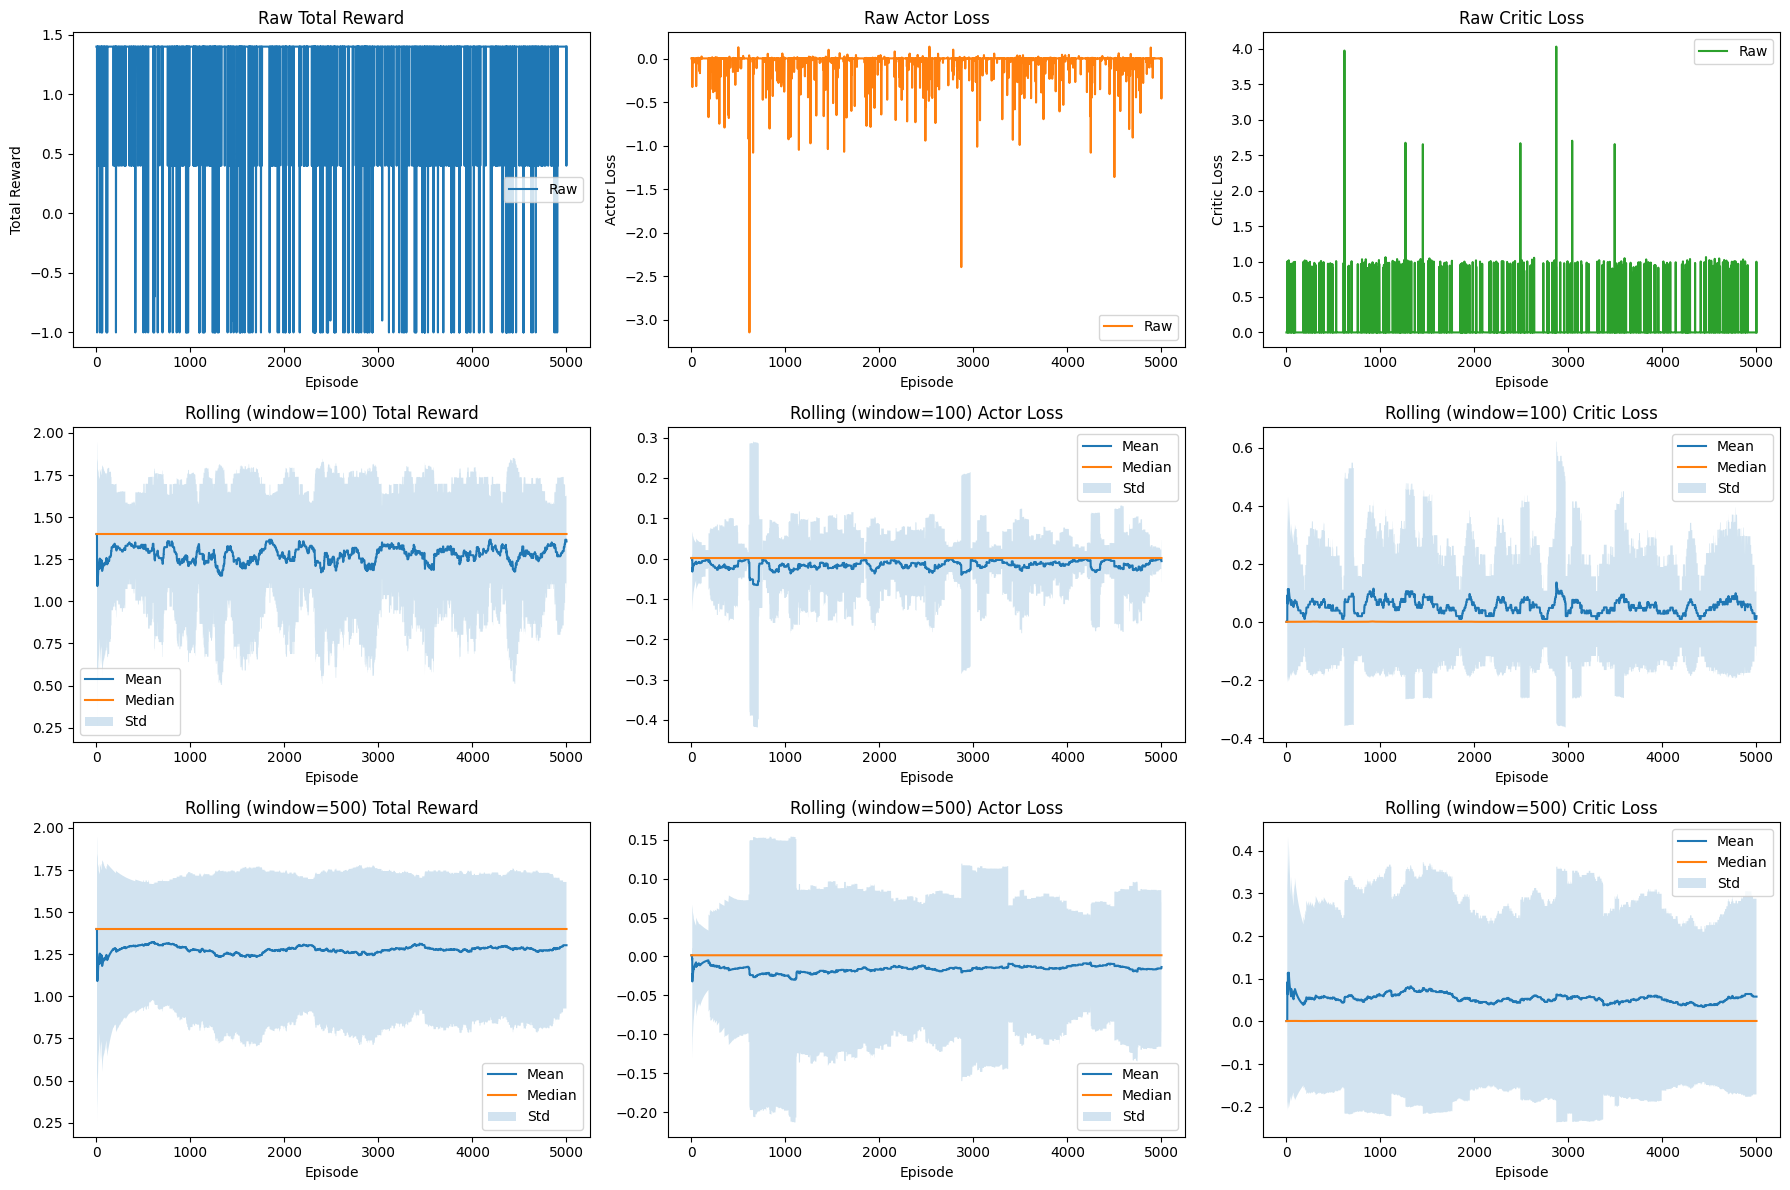

/mnt/c/Users/imcir/Desktop/CIENCIA DATOS/Segundo cuatrimestre/TFM/Código/Modules/helper_functions.py:956: RuntimeWarning: Mean of empty slice
  mean_rate_per_episode = np.nanmean(firing_rates, axis=0)


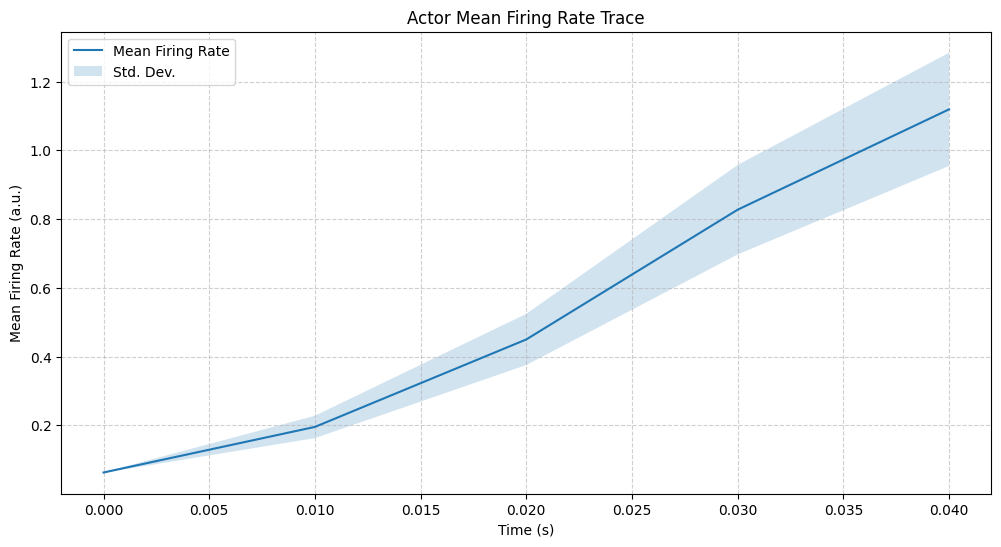


Porcentaje de acierto calculado por condición:
     f1    f2  is_correct  percentage
0  10.0  18.0    0.941667          94
1  14.0  22.0    0.967677          96
2  18.0  10.0    0.923554          92
3  18.0  26.0    0.955357          95
4  22.0  14.0    0.938776          93
5  22.0  30.0    0.956790          95
6  26.0  18.0    0.949791          95
7  26.0  34.0    0.932000          93
8  30.0  22.0    0.956432          95
9  34.0  26.0    0.964775          96


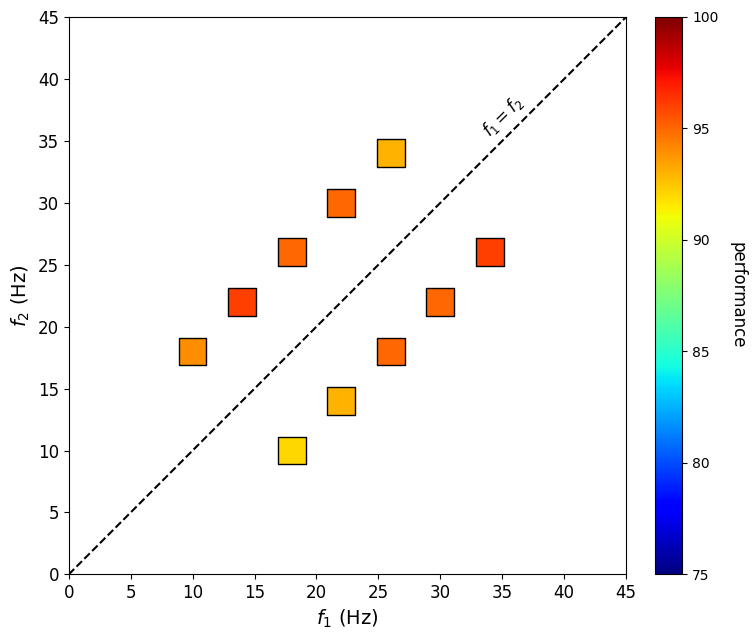


Rendimiento por Número de Clase:
   class_number      mean       sem  mean_perc  sem_perc
0             1  0.932000  0.011270  93.200000  1.126969
1             2  0.956790  0.009233  95.679012  0.923271
2             3  0.955357  0.009768  95.535714  0.976799
3             4  0.967677  0.007957  96.767677  0.795718
4             5  0.941667  0.010709  94.166667  1.070876
5             6  0.964775  0.008163  96.477495  0.816307
6             7  0.956432  0.009308  95.643154  0.930766
7             8  0.949791  0.009999  94.979079  0.999877
8             9  0.938776  0.010841  93.877551  1.084149
9            10  0.923554  0.012090  92.355372  1.209026


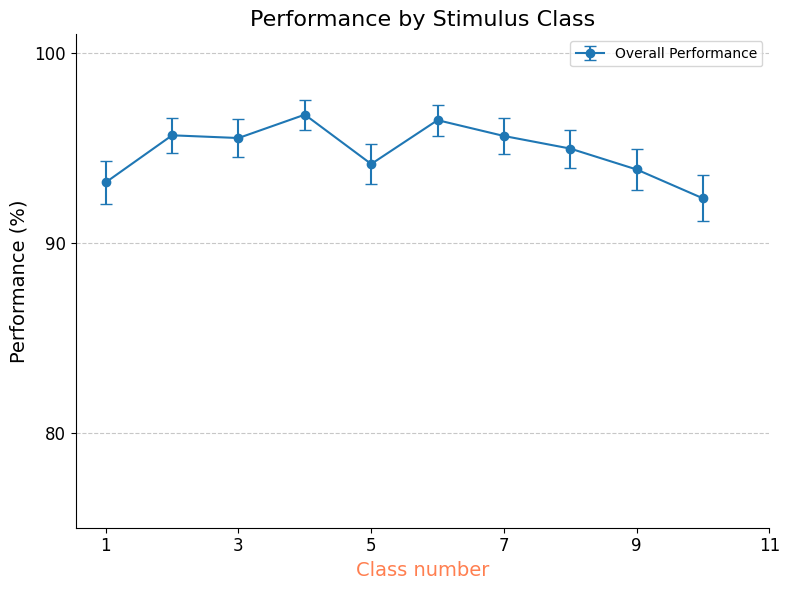


Closing the environment...
Environment closed.


In [6]:
def main():
    # --- Training Configuration ---
    config = {
        "dt": 10,
        "reward_correct": 1.0,
        "reward_incorrect": 0.0,
        "reward_aborted": -1.0,
        "input_noise_sigma": 0.15,
        "reward_fixation": 0.1,
        "reward_decide_fixation": -0.1,
        "duration_params": [10, 10, 10, 10, 10, 10], 
        "actor_hidden_size": 150,
        "critic_hidden_size": 150,
        "actor_layers": 1,
        "critic_layers": 1,
        "layer_type": "GRU_modified",
        "actor_lr": 1e-4,
        "critic_lr": 1e-4,
        "num_episodes": 5000,
        "gamma": 1.0,
        "l2_actor": 1e-4,
        "l2_critic": 1e-4,
        "print_interval": 100,
        "record_history": True
    }

    print("Configuration loaded:")
    for key, value in config.items():
        print(f"  {key}: {value}")

    # --- Configuración del Entorno ---
    print("\nCreating WorkingMemory environment...")
    env = WorkingMemoryEnv(
        dt=config["dt"],
        reward_correct=config["reward_correct"],
        reward_incorrect=config["reward_incorrect"],
        reward_aborted=config["reward_aborted"],
        reward_fixation=config["reward_fixation"],
        reward_decide_fixation=config["reward_decide_fixation"],
        input_noise_sigma=config["input_noise_sigma"],
        duration_params=config["duration_params"]
    )
    obs_size = env.observation_space.shape[0]
    act_size = env.action_space.n
    print(f"Observation size: {obs_size}, Action size: {act_size}")

    # --- Configuración del Agente ---
    print("\nInitializing Actor-Critic Agent...")
    agent = ActorCriticAgent(
        obs_size=obs_size,
        act_size=act_size,
        actor_hidden_size=config["actor_hidden_size"],
        critic_hidden_size=config["critic_hidden_size"],
        actor_layers=config["actor_layers"],
        critic_layers=config["critic_layers"],
        actor_lr=config["actor_lr"],
        critic_lr=config["critic_lr"],
        layer_type=config["layer_type"]
    )
    print("Agent Initialized.")

    # --- Load checkpoint ---
    this_stage = 5
    this_ckpt_dir = 'checkpoints/WM+_F_rnn'
    load_model(agent, obs_size, act_size, this_stage, this_ckpt_dir)

    # --- Entrenamiento ---
    print(f"\nStarting training for {config['num_episodes']} episodes...")
    total_rewards_history, actor_loss_history, critic_loss_history, actor_firing_rates, critic_firing_rates, other_measurements = train_agent(
        env=env,
        agent=agent,
        num_episodes=config["num_episodes"],
        gamma=config["gamma"],
        print_interval=config["print_interval"],
        l2_actor=config["l2_actor"],
        l2_critic=config["l2_critic"],
        record_history=config["record_history"]
    )
    print("\nTraining finished.")

    # --- Guardar checkpoint del modelo ---
    this_stage = 5
    this_ckpt_dir = 'checkpoints/WM+_F_rnn'
    save_model(agent, this_stage, this_ckpt_dir)

    # --- Save outputs ---
    output_dir  = Path.cwd() / "outputs"
    output_dir.mkdir(parents=True, exist_ok=True)
    output_file = output_dir / "WM+_F_rnn_5.pkl"
    with open(output_file, "wb") as f:
        pickle.dump((
            total_rewards_history,
            actor_loss_history,
            critic_loss_history,
            actor_firing_rates,
            critic_firing_rates,
            other_measurements
        ), f)
    print(f"Training history saved to {output_file}")
        
    # --- Graficar Métricas de Entrenamiento y Rendimiento ---
    print("\nPlotting results...")
    
    plot_metrics(
        total_rewards_history,
        actor_loss_history,
        critic_loss_history,
        window_1=max(20, config["num_episodes"] // 50),
        window_2=max(50, config["num_episodes"] // 10)
    )

    plot_mean_firing_rate_trace(
        actor_firing_rates,
        dt=config['dt'],
        title="Actor Mean Firing Rate Trace"
    )

    plot_performance_matrix(other_measurements)

    sesgo_contraccion(other_measurements)

    # --- Cerrar el Entorno ---
    print("\nClosing the environment...")
    env.close()
    print("Environment closed.")


if __name__ == '__main__':
    main()

Configuration loaded:
  dt: 10
  reward_correct: 1.0
  reward_incorrect: 0.0
  reward_aborted: -1.0
  input_noise_sigma: 0.125
  reward_fixation: 0.1
  reward_decide_fixation: -0.1
  duration_params: [10, 10, 10, 10, 10, 10]
  actor_hidden_size: 150
  critic_hidden_size: 150
  actor_layers: 1
  critic_layers: 1
  layer_type: GRU_modified
  actor_lr: 0.0001
  critic_lr: 0.0001
  num_episodes: 1000
  gamma: 1.0
  l2_actor: 0.0001
  l2_critic: 0.0001
  print_interval: 100
  record_history: True

Creating WorkingMemory environment...
Observation size: 3, Action size: 3

Initializing Actor-Critic Agent...
Agent Initialized.
Actor and Critic networks built.
Performing dummy forward to build cells and weights for mask loading...
Loading masks from stage 4...
Masks loaded.
Initializing optimizers with dummy step...


/mnt/c/Users/imcir/Desktop/CIENCIA DATOS/cienciadatosenv/lib/python3.12/site-packages/keras/src/layers/layer.py:396: UserWarning: `build()` was called on layer 'actor_model_4', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/mnt/c/Users/imcir/Desktop/CIENCIA DATOS/cienciadatosenv/lib/python3.12/site-packages/keras/src/layers/layer.py:396: UserWarning: `build()` was called on layer 'critic_model_4', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


Optimizers initialized.
Restoring from checkpoint: checkpoints/WM+_F_rnn_4/ckpt-1
Checkpoint restored successfully.

Starting training for 1000 episodes...
Episode 100	Total Reward: 1.40	State [0. 0. 0.]	Actor Loss: 0.0014	Critic Loss: 0.0018	Actions: [0, 0, 0, 0, 1]	M: N/A	Tau: N/A	
Episode 200	Total Reward: 1.40	State [0. 0. 0.]	Actor Loss: 0.0014	Critic Loss: 0.0007	Actions: [0, 0, 0, 0, 1]	M: N/A	Tau: N/A	
Episode 300	Total Reward: 1.40	State [0. 0. 0.]	Actor Loss: 0.0016	Critic Loss: 0.0011	Actions: [0, 0, 0, 0, 1]	M: N/A	Tau: N/A	
Episode 400	Total Reward: 1.40	State [0. 0. 0.]	Actor Loss: 0.0016	Critic Loss: 0.0007	Actions: [0, 0, 0, 0, 2]	M: N/A	Tau: N/A	
Episode 500	Total Reward: 0.40	State [0. 0. 0.]	Actor Loss: -0.4505	Critic Loss: 0.9900	Actions: [0, 0, 0, 0, 2]	M: N/A	Tau: N/A	
Episode 600	Total Reward: 1.40	State [0. 0. 0.]	Actor Loss: 0.0016	Critic Loss: 0.0010	Actions: [0, 0, 0, 0, 1]	M: N/A	Tau: N/A	
Episode 700	Total Reward: 1.40	State [0. 0. 0.]	Actor Loss: 0.0014	Cr

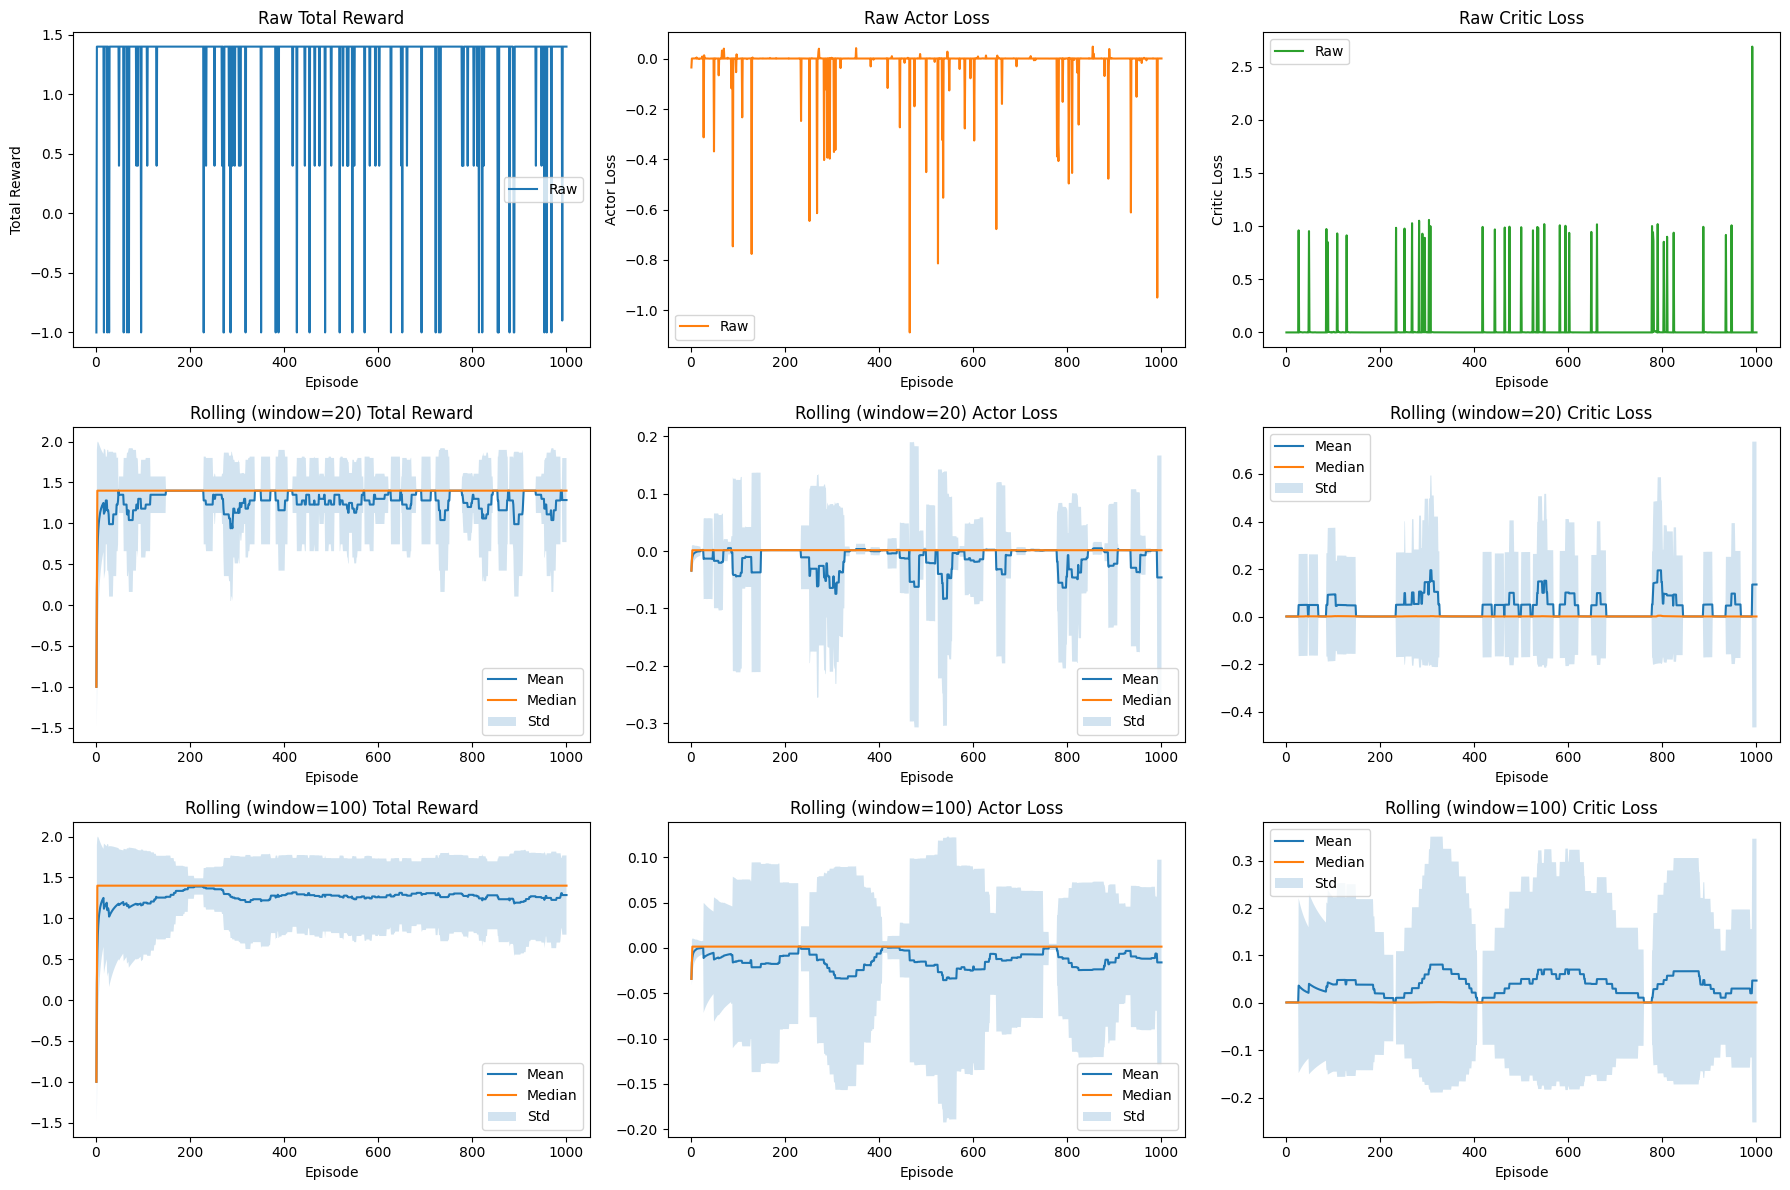

/mnt/c/Users/imcir/Desktop/CIENCIA DATOS/Segundo cuatrimestre/TFM/Código/Modules/helper_functions.py:956: RuntimeWarning: Mean of empty slice
  mean_rate_per_episode = np.nanmean(firing_rates, axis=0)


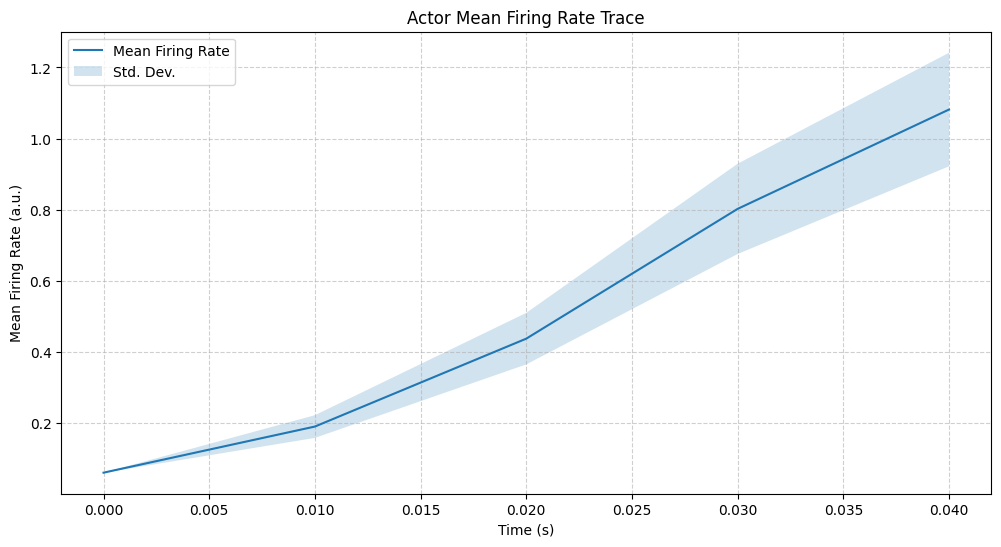


Porcentaje de acierto calculado por condición:
     f1    f2  is_correct  percentage
0  10.0  18.0    0.968750          96
1  14.0  22.0    0.946809          94
2  18.0  10.0    0.934579          93
3  18.0  26.0    0.967391          96
4  22.0  14.0    0.931818          93
5  22.0  30.0    0.946903          94
6  26.0  18.0    0.988095          98
7  26.0  34.0    0.989899          99
8  30.0  22.0    0.977011          97
9  34.0  26.0    0.960396          96


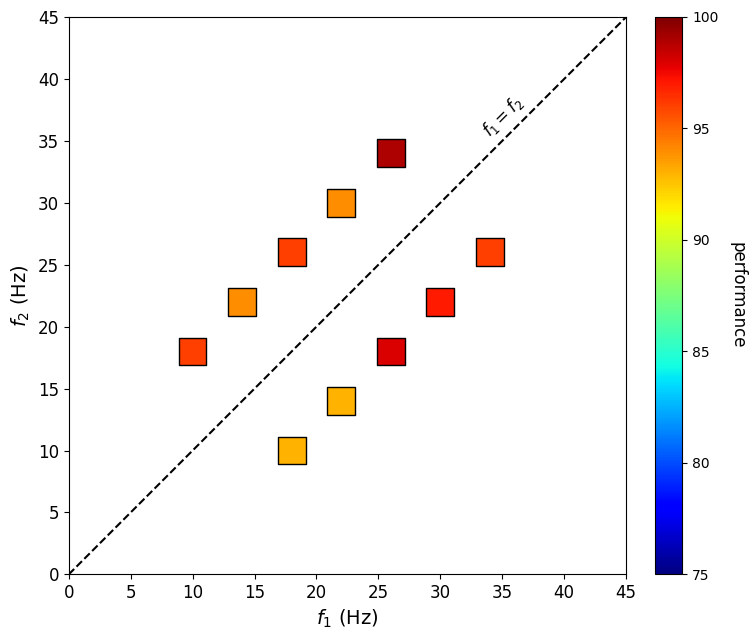


Rendimiento por Número de Clase:
   class_number      mean       sem  mean_perc  sem_perc
0             1  0.989899  0.010101  98.989899  1.010101
1             2  0.946903  0.021188  94.690265  2.118752
2             3  0.967391  0.018619  96.739130  1.861860
3             4  0.946809  0.023271  94.680851  2.327077
4             5  0.968750  0.017851  96.875000  1.785127
5             6  0.960396  0.019503  96.039604  1.950269
6             7  0.977011  0.016161  97.701149  1.616054
7             8  0.988095  0.011905  98.809524  1.190476
8             9  0.931818  0.027023  93.181818  2.702342
9            10  0.934579  0.024017  93.457944  2.401664


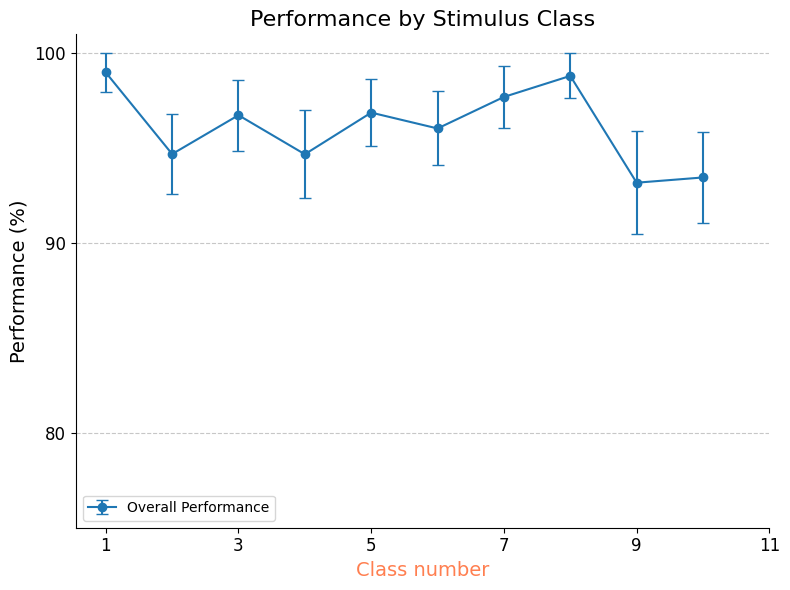


Closing the environment...
Environment closed.


In [7]:
def main():
    # --- Training Configuration ---
    config = {
        "dt": 10,
        "reward_correct": 1.0,
        "reward_incorrect": 0.0,
        "reward_aborted": -1.0,
        "input_noise_sigma": 0.125,
        "reward_fixation": 0.1,
        "reward_decide_fixation": -0.1,
        "duration_params": [10, 10, 10, 10, 10, 10], 
        "actor_hidden_size": 150,
        "critic_hidden_size": 150,
        "actor_layers": 1,
        "critic_layers": 1,
        "layer_type": "GRU_modified",
        "actor_lr": 1e-4,
        "critic_lr": 1e-4,
        "num_episodes": 1000,
        "gamma": 1.0,
        "l2_actor": 1e-4,
        "l2_critic": 1e-4,
        "print_interval": 100,
        "record_history": True
    }

    print("Configuration loaded:")
    for key, value in config.items():
        print(f"  {key}: {value}")

    # --- Configuración del Entorno ---
    print("\nCreating WorkingMemory environment...")
    env = WorkingMemoryEnv(
        dt=config["dt"],
        reward_correct=config["reward_correct"],
        reward_incorrect=config["reward_incorrect"],
        reward_aborted=config["reward_aborted"],
        reward_fixation=config["reward_fixation"],
        reward_decide_fixation=config["reward_decide_fixation"],
        input_noise_sigma=config["input_noise_sigma"],
        duration_params=config["duration_params"]
    )
    obs_size = env.observation_space.shape[0]
    act_size = env.action_space.n
    print(f"Observation size: {obs_size}, Action size: {act_size}")

    # --- Configuración del Agente ---
    print("\nInitializing Actor-Critic Agent...")
    agent = ActorCriticAgent(
        obs_size=obs_size,
        act_size=act_size,
        actor_hidden_size=config["actor_hidden_size"],
        critic_hidden_size=config["critic_hidden_size"],
        actor_layers=config["actor_layers"],
        critic_layers=config["critic_layers"],
        actor_lr=config["actor_lr"],
        critic_lr=config["critic_lr"],
        layer_type=config["layer_type"]
    )
    print("Agent Initialized.")

    # --- Load checkpoint ---
    this_stage = 5
    this_ckpt_dir = 'checkpoints/WM+_F_rnn'
    load_model(agent, obs_size, act_size, this_stage, this_ckpt_dir)

    # --- Entrenamiento ---
    print(f"\nStarting training for {config['num_episodes']} episodes...")
    total_rewards_history, actor_loss_history, critic_loss_history, actor_firing_rates, critic_firing_rates, other_measurements = train_agent(
        env=env,
        agent=agent,
        num_episodes=config["num_episodes"],
        gamma=config["gamma"],
        print_interval=config["print_interval"],
        l2_actor=config["l2_actor"],
        l2_critic=config["l2_critic"],
        record_history=config["record_history"]
    )
    print("\nTraining finished.")

    # --- Guardar checkpoint del modelo ---
    this_stage = 5
    this_ckpt_dir = 'checkpoints/WM+_F_rnn'
    save_model(agent, this_stage, this_ckpt_dir)

    # --- Save outputs ---
    output_dir  = Path.cwd() / "outputs"
    output_dir.mkdir(parents=True, exist_ok=True)
    output_file = output_dir / "WM+_F_rnn_5.pkl"
    with open(output_file, "wb") as f:
        pickle.dump((
            total_rewards_history,
            actor_loss_history,
            critic_loss_history,
            actor_firing_rates,
            critic_firing_rates,
            other_measurements
        ), f)
    print(f"Training history saved to {output_file}")
        
    # --- Graficar Métricas de Entrenamiento y Rendimiento ---
    print("\nPlotting results...")
    
    plot_metrics(
        total_rewards_history,
        actor_loss_history,
        critic_loss_history,
        window_1=max(20, config["num_episodes"] // 50),
        window_2=max(50, config["num_episodes"] // 10)
    )

    plot_mean_firing_rate_trace(
        actor_firing_rates,
        dt=config['dt'],
        title="Actor Mean Firing Rate Trace"
    )

    plot_performance_matrix(other_measurements)

    sesgo_contraccion(other_measurements)

    # --- Cerrar el Entorno ---
    print("\nClosing the environment...")
    env.close()
    print("Environment closed.")


if __name__ == '__main__':
    main()

Configuration loaded:
  dt: 10
  reward_correct: 1.0
  reward_incorrect: 0.0
  reward_aborted: -1.0
  input_noise_sigma: 0.1
  reward_fixation: 0.1
  reward_decide_fixation: -0.1
  duration_params: [10, 10, 10, 10, 10, 10]
  actor_hidden_size: 150
  critic_hidden_size: 150
  actor_layers: 1
  critic_layers: 1
  layer_type: GRU_modified
  actor_lr: 0.0001
  critic_lr: 0.0001
  num_episodes: 1000
  gamma: 1.0
  l2_actor: 0.0001
  l2_critic: 0.0001
  print_interval: 100
  record_history: True

Creating WorkingMemory environment...
Observation size: 3, Action size: 3

Initializing Actor-Critic Agent...
Agent Initialized.
Actor and Critic networks built.
Performing dummy forward to build cells and weights for mask loading...
Loading masks from stage 4...
Masks loaded.
Initializing optimizers with dummy step...


/mnt/c/Users/imcir/Desktop/CIENCIA DATOS/cienciadatosenv/lib/python3.12/site-packages/keras/src/layers/layer.py:396: UserWarning: `build()` was called on layer 'actor_model_5', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/mnt/c/Users/imcir/Desktop/CIENCIA DATOS/cienciadatosenv/lib/python3.12/site-packages/keras/src/layers/layer.py:396: UserWarning: `build()` was called on layer 'critic_model_5', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


Optimizers initialized.
Restoring from checkpoint: checkpoints/WM+_F_rnn_4/ckpt-1
Checkpoint restored successfully.

Starting training for 1000 episodes...
Episode 100	Total Reward: 1.40	State [0. 0. 0.]	Actor Loss: 0.0014	Critic Loss: 0.0007	Actions: [0, 0, 0, 0, 1]	M: N/A	Tau: N/A	
Episode 200	Total Reward: 1.40	State [0. 0. 0.]	Actor Loss: 0.0015	Critic Loss: 0.0008	Actions: [0, 0, 0, 0, 2]	M: N/A	Tau: N/A	
Episode 300	Total Reward: 1.40	State [0. 0. 0.]	Actor Loss: 0.0015	Critic Loss: 0.0007	Actions: [0, 0, 0, 0, 2]	M: N/A	Tau: N/A	
Episode 400	Total Reward: 1.40	State [0. 0. 0.]	Actor Loss: 0.0022	Critic Loss: 0.0008	Actions: [0, 0, 0, 0, 1]	M: N/A	Tau: N/A	
Episode 500	Total Reward: 1.40	State [0. 0. 0.]	Actor Loss: 0.0015	Critic Loss: 0.0008	Actions: [0, 0, 0, 0, 1]	M: N/A	Tau: N/A	
Episode 600	Total Reward: 1.40	State [0. 0. 0.]	Actor Loss: 0.0033	Critic Loss: 0.0018	Actions: [0, 0, 0, 0, 1]	M: N/A	Tau: N/A	
Episode 700	Total Reward: 1.40	State [0. 0. 0.]	Actor Loss: 0.0019	Cri

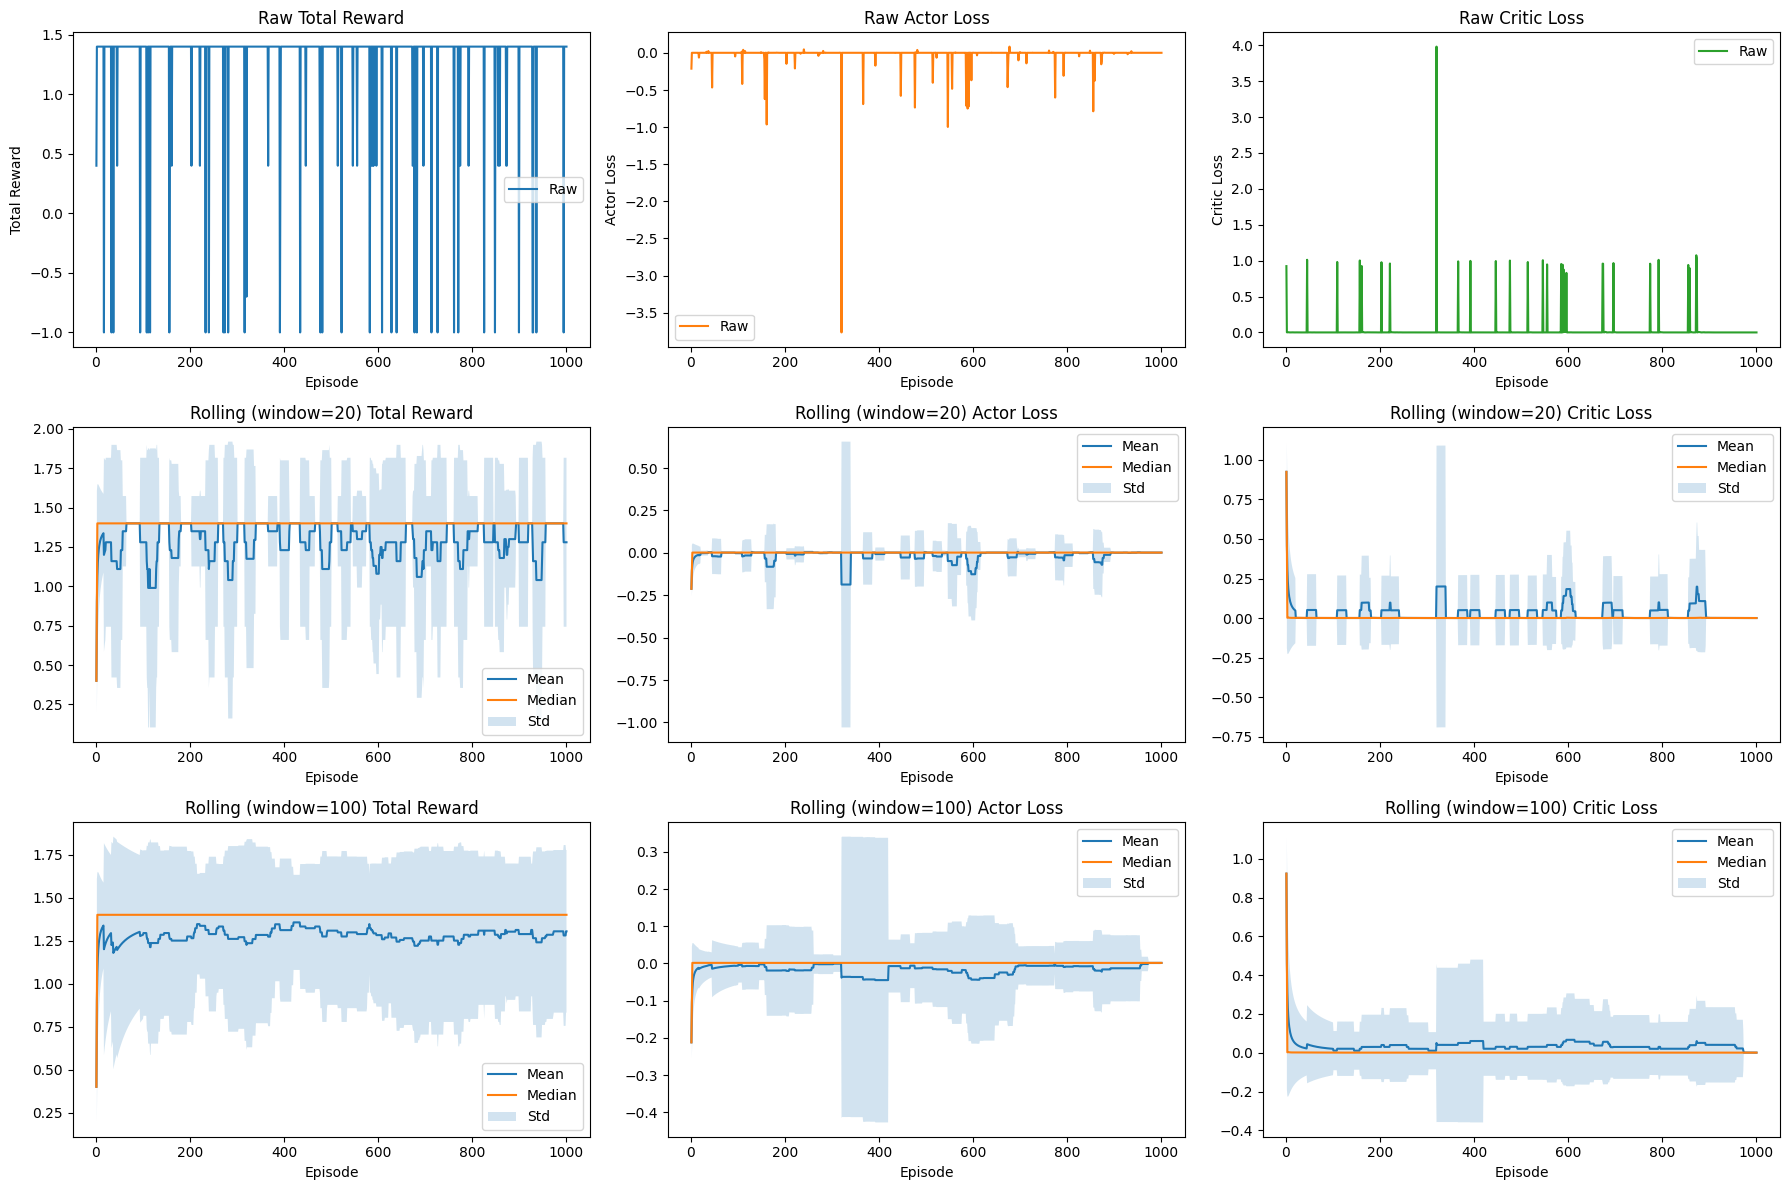

/mnt/c/Users/imcir/Desktop/CIENCIA DATOS/Segundo cuatrimestre/TFM/Código/Modules/helper_functions.py:956: RuntimeWarning: Mean of empty slice
  mean_rate_per_episode = np.nanmean(firing_rates, axis=0)


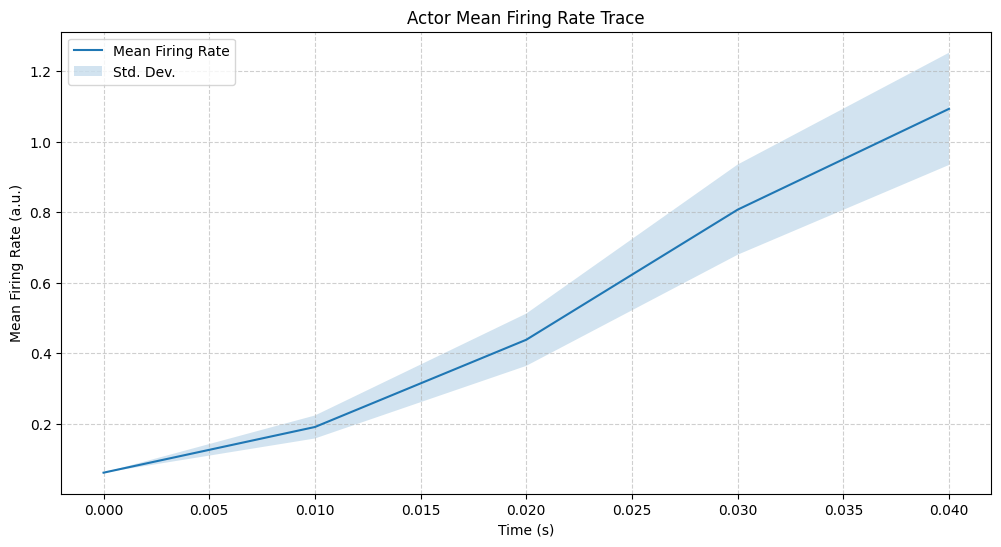


Porcentaje de acierto calculado por condición:
     f1    f2  is_correct  percentage
0  10.0  18.0    0.955752          95
1  14.0  22.0    1.000000         100
2  18.0  10.0    0.976744          97
3  18.0  26.0    0.981651          98
4  22.0  14.0    0.927835          92
5  22.0  30.0    0.960000          96
6  26.0  18.0    0.982301          98
7  26.0  34.0    0.962500          96
8  30.0  22.0    0.972222          97
9  34.0  26.0    1.000000         100


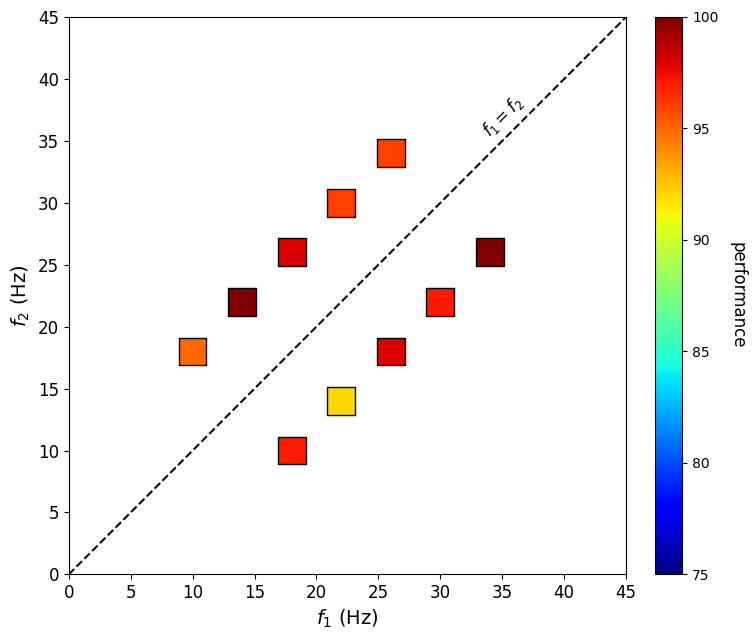


Rendimiento por Número de Clase:
   class_number      mean       sem   mean_perc  sem_perc
0             1  0.962500  0.021375   96.250000  2.137482
1             2  0.960000  0.022780   96.000000  2.277979
2             3  0.981651  0.012914   98.165138  1.291423
3             4  1.000000  0.000000  100.000000  0.000000
4             5  0.955752  0.019432   95.575221  1.943164
5             6  1.000000  0.000000  100.000000  0.000000
6             7  0.972222  0.015887   97.222222  1.588692
7             8  0.982301  0.012459   98.230088  1.245917
8             9  0.927835  0.026410   92.783505  2.640967
9            10  0.976744  0.016347   97.674419  1.634733


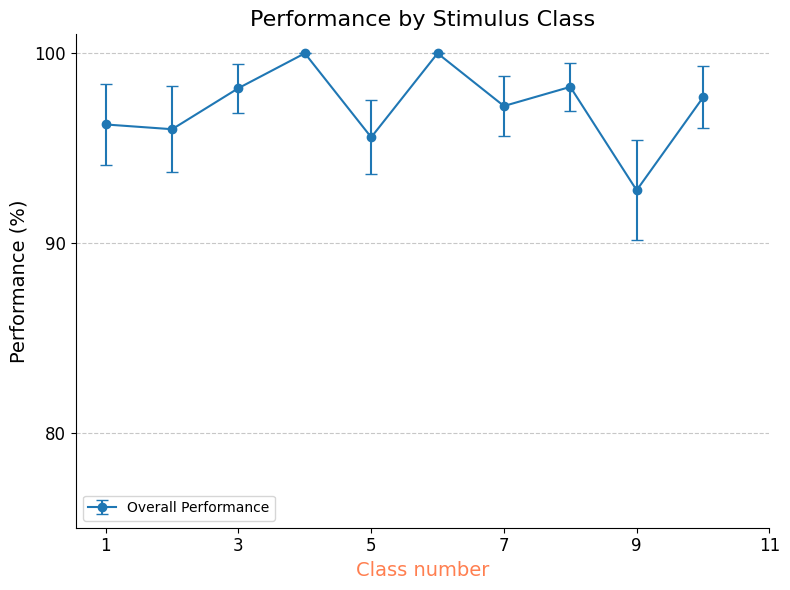


Closing the environment...
Environment closed.


In [8]:
def main():
    # --- Training Configuration ---
    config = {
        "dt": 10,
        "reward_correct": 1.0,
        "reward_incorrect": 0.0,
        "reward_aborted": -1.0,
        "input_noise_sigma": 0.10,
        "reward_fixation": 0.1,
        "reward_decide_fixation": -0.1,
        "duration_params": [10, 10, 10, 10, 10, 10], 
        "actor_hidden_size": 150,
        "critic_hidden_size": 150,
        "actor_layers": 1,
        "critic_layers": 1,
        "layer_type": "GRU_modified",
        "actor_lr": 1e-4,
        "critic_lr": 1e-4,
        "num_episodes": 1000,
        "gamma": 1.0,
        "l2_actor": 1e-4,
        "l2_critic": 1e-4,
        "print_interval": 100,
        "record_history": True
    }

    print("Configuration loaded:")
    for key, value in config.items():
        print(f"  {key}: {value}")

    # --- Configuración del Entorno ---
    print("\nCreating WorkingMemory environment...")
    env = WorkingMemoryEnv(
        dt=config["dt"],
        reward_correct=config["reward_correct"],
        reward_incorrect=config["reward_incorrect"],
        reward_aborted=config["reward_aborted"],
        reward_fixation=config["reward_fixation"],
        reward_decide_fixation=config["reward_decide_fixation"],
        input_noise_sigma=config["input_noise_sigma"],
        duration_params=config["duration_params"]
    )
    obs_size = env.observation_space.shape[0]
    act_size = env.action_space.n
    print(f"Observation size: {obs_size}, Action size: {act_size}")

    # --- Configuración del Agente ---
    print("\nInitializing Actor-Critic Agent...")
    agent = ActorCriticAgent(
        obs_size=obs_size,
        act_size=act_size,
        actor_hidden_size=config["actor_hidden_size"],
        critic_hidden_size=config["critic_hidden_size"],
        actor_layers=config["actor_layers"],
        critic_layers=config["critic_layers"],
        actor_lr=config["actor_lr"],
        critic_lr=config["critic_lr"],
        layer_type=config["layer_type"]
    )
    print("Agent Initialized.")

    # --- Load checkpoint ---
    this_stage = 5
    this_ckpt_dir = 'checkpoints/WM+_F_rnn'
    load_model(agent, obs_size, act_size, this_stage, this_ckpt_dir)

    # --- Entrenamiento ---
    print(f"\nStarting training for {config['num_episodes']} episodes...")
    total_rewards_history, actor_loss_history, critic_loss_history, actor_firing_rates, critic_firing_rates, other_measurements = train_agent(
        env=env,
        agent=agent,
        num_episodes=config["num_episodes"],
        gamma=config["gamma"],
        print_interval=config["print_interval"],
        l2_actor=config["l2_actor"],
        l2_critic=config["l2_critic"],
        record_history=config["record_history"]
    )
    print("\nTraining finished.")

    # --- Guardar checkpoint del modelo ---
    this_stage = 5
    this_ckpt_dir = 'checkpoints/WM+_F_rnn'
    save_model(agent, this_stage, this_ckpt_dir)

    # --- Save outputs ---
    output_dir  = Path.cwd() / "outputs"
    output_dir.mkdir(parents=True, exist_ok=True)
    output_file = output_dir / "WM+_F_rnn_5.pkl"
    with open(output_file, "wb") as f:
        pickle.dump((
            total_rewards_history,
            actor_loss_history,
            critic_loss_history,
            actor_firing_rates,
            critic_firing_rates,
            other_measurements
        ), f)
    print(f"Training history saved to {output_file}")
        
    # --- Graficar Métricas de Entrenamiento y Rendimiento ---
    print("\nPlotting results...")
    
    plot_metrics(
        total_rewards_history,
        actor_loss_history,
        critic_loss_history,
        window_1=max(20, config["num_episodes"] // 50),
        window_2=max(50, config["num_episodes"] // 10)
    )

    plot_mean_firing_rate_trace(
        actor_firing_rates,
        dt=config['dt'],
        title="Actor Mean Firing Rate Trace"
    )

    plot_performance_matrix(other_measurements)

    sesgo_contraccion(other_measurements)

    # --- Cerrar el Entorno ---
    print("\nClosing the environment...")
    env.close()
    print("Environment closed.")


if __name__ == '__main__':
    main()